# Analisis Sentimen dan Prediksi dengan Random Forest pada Data Debat Capres Kedua dari Channel Najwa Shihab

Eros Alfedo Hermanto (2108096006) <br>
Insanu Sholeh Jum Gunawan (2108096032)

## 1. Instalasi Library

Kode ini menginstal beberapa paket Python yang diperlukan untuk menjalankan skrip, seperti transformers untuk tugas pemrosesan bahasa alami, googletrans untuk mentranslasi teks, fuzzywuzzy untuk mencari kesamaan antara dua string, dan sastrawi untuk memproses teks bahasa Indonesia.

In [ ]:
!pip install transformers

In [ ]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=a85e1c497d16185c09726ee3dd0b948f8dd7fb9db5c2d0925bb2a8e9589baafa
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling ch

In [ ]:
!pip install fuzzywuzzy

In [ ]:
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.0 MB/s eta 0:00:00


In [ ]:
!pip install fuzzywuzzy

In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 3.5 MB/s eta 0:00:00


In [ ]:
!pip install textacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.7 MB/s eta 0:00:00


## 2. Import Library dan Load Data

Pada bagian ini, kode melakukan import library yang diperlukan dan memuat data komentar YouTube dari file CSV.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import re
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
data_path = "youtube_comments.csv"

In [ ]:
data = pd.read_csv(data_path)

In [ ]:
data

author          published_at  \
0                  @user-wl4ji6hv4u  2024-03-05T05:03:40Z   
1                @mustafashaleh4150  2024-02-20T01:57:28Z   
2     @IseanwarsadadAmangzian-rw9xe  2024-02-18T18:33:16Z   
3                    @bobamochi2679  2024-02-18T08:22:49Z   
4               @lizaherlambang1811  2024-02-13T23:22:57Z   
...                             ...                   ...   
4740                 @haikalhyakuya  2024-01-07T16:01:51Z   
4741        @andijaelanichannel6163  2024-01-07T16:01:50Z   
4742            @ilhambudiaraya1257  2024-01-07T16:01:41Z   
4743                  @LangkahMudah  2024-01-07T16:01:35Z   
4744                   @Nname-ou3gu  2024-01-07T16:01:21Z   

                updated_at  like_count  \
0     2024-03-05T05:03:40Z         0.0   
1     2024-02-20T01:57:28Z         3.0   
2     2024-02-18T18:33:16Z         0.0   
3     2024-02-18T08:22:49Z         0.0   
4     2024-02-13T23:22:57Z         3.0   
...                    ...         ...   
4740  2024-01-07T16:01:51Z        13.0   
4741  2024-01-07T16:01:50Z         0.0   
4742  2024-01-07T16:01:41Z         4.0   
4743  2024-01-07T16:01:35Z        17.0   
4744  2024-01-07T16:01:21Z        21.0   

                                                   text  
0                                             all in 02  
1     <a href="https://www.youtube.com/watch?v=Sbjsg...  
2     P Prabowo p Ganjar jadikan Mentri pertahanan p...  
3                                       Love Pak Anies!  
4     Wong pertahanan negara kok disuruh terbuka utk...  
...                                                 ...  
4740         Debat kedua Capres ini seruu bangetttt🔥🔥🔥🔥  
4741                                        Bismillah 😊  
4742                                                  2  
4743               1 FOREVER, 2-3 no more...!!! AM1N!!!  
4744  Rekap debat capres malam ini (gw buat seobjekt...  

[4745 rows x 5 columns]

## 3. Preprocessing dan Translasi Text

Bagian ini mentranslasi teks komentar dari bahasa Indonesia ke bahasa Inggris menggunakan googletrans. Sebelum ditranslasi, teks dibersihkan dari karakter non-alfanumerik dan URL menggunakan fungsi clean_tweet.

In [ ]:
# Inisialisasi translator dan sentiment classifier
from googletrans import Translator
translator = Translator()

from transformers import pipeline
sentiment_classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
# # Fungsi untuk membersihkan teks
def clean_tweet(tweet):
  return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [ ]:
# # Mentranslasi teks ke bahasa Inggris dan membersihkan teks
data['label'] = data["text"].str.encode('ascii','ignore').apply(translator.translate, dest='en')
data['label'] = data["label"].apply(getattr, args=('text',))
data['label'] = data.apply(lambda x: clean_tweet(x['label']), axis=1)

In [ ]:
data.sample(20)

author          published_at            updated_at  \
474           @atvpedianet2960  2024-01-09T18:37:47Z  2024-01-09T18:37:47Z   
3379        @masterpoinggg8369  2024-01-07T20:10:28Z  2024-01-07T20:10:28Z   
3516             @crabclay8482  2024-01-07T19:24:18Z  2024-01-07T19:24:18Z   
2227     @m.naufalfirdanit6477  2024-01-08T04:45:02Z  2024-01-08T04:45:02Z   
4439      @desriantofariza6613  2024-01-07T16:42:45Z  2024-01-07T16:42:45Z   
792   @fazlinanurkholiza-zb4mt  2024-01-09T06:46:02Z  2024-01-09T06:46:02Z   
1093           @fajrunnaja7708  2024-01-08T18:38:51Z  2024-01-08T18:38:51Z   
1082             @okievaleno77  2024-01-08T18:57:49Z  2024-01-08T18:57:49Z   
2446             @dewidewi9318  2024-01-08T03:02:42Z  2024-01-08T03:02:42Z   
1083               @kangml8150  2024-01-08T18:57:15Z  2024-01-08T18:57:15Z   
1278          @user-op1ds9ki1c  2024-01-08T15:50:09Z  2024-01-08T15:50:09Z   
3317      @bayurukebertake7779  2024-01-07T20:38:06Z  2024-01-07T20:39:38Z   
2524          @ekokuswanto1697  2024-01-08T02:29:25Z  2024-01-08T02:29:25Z   
2685          @areajelajah2562  2024-01-08T01:33:19Z  2024-01-08T01:33:19Z   
4573               @quzuqbotak  2024-01-07T16:26:49Z  2024-01-07T16:30:47Z   
2312              @sumarni6382  2024-01-08T04:07:25Z  2024-01-08T04:07:25Z   
1338      @firnandasaputra3028  2024-01-08T15:05:32Z  2024-01-08T15:05:32Z   
933        @iyanapriansyah9543  2024-01-09T02:05:55Z  2024-01-09T02:05:55Z   
3660         @magnumfilter5771  2024-01-07T18:46:00Z  2024-01-07T18:46:00Z   
605              @leanamey5528  2024-01-09T13:17:30Z  2024-01-09T13:17:30Z   

      like_count                                               text  \
474          0.0  Kalau aku sih entah pak wowo atau pak ganjar m...   
3379         0.0  Mba nana cuman heran aja itu yang teriak&quot;...   
3516         1.0  dan Hati-Hati, capres 1&amp;3 punya banyak Buz...   
2227         0.0                         Pak ganjar,pak anis mantap   
4439         1.0         Nomor 1 hanya teori,  dia tdk bs eksekusi,   
792          1.0             Tetap no 2. Sehat selalu pak prabowo ❤   
1093         0.0  Jika dilihat lama2 kasian juga pak prabowo dis...   
1082         1.0  Disini yg prajurit siapa yg seakan paling nger...   
2446         0.0   Pak Probowo minta dikasihanny gitu ya mbk Nana .   
1083         1.0  Anies terlalu munafik😂mana bisa data negara di...   
1278         0.0  mulai dari awal muka nya anis kaya nantang gel...   
3317         2.0  2024 adalah milik No 2 karna 2+0+2+4=8  jadi n...   
2524         0.0                                     All in prabowo   
2685         1.0  Jujur gw pendukung 01 AMIN. Tapi harus diakui ...   
4573         8.0  <b>prabohong dibedaki dengan gemoy, fix bedak ...   
2312         1.0  Emang bisa nyalahin covis sama mentri keuangan...   
1338         2.0  Apa cuma gua yg kayak melihat anis hanya membu...   
933          0.0  Anjirr kaget saya sama pak anis masa suruh buk...   
3660         0.0  Warga saya satu RW 90% AMIN. <br>mengapa....?<...   
605          0.0  Dulu probowi vs jokowi, prabowo pinter omong l...   

                                                  label  
474   As for me I don t know if Mr Wowo and Mr Ganga...  
3379  Mba Nana was just surprised that it was the on...  
3516  b and be careful presidential candidates 1 3 h...  
2227                        Mr Ganjar Mr Anies is great  
4439             Number 1 is just from he can t execute  
792      b Still number 2 Always be healthy Pak Prabowo  
1093  b If you look at it for a long time it s a sha...  
1082  Here who is the soldier who seems to know the ...  
2446                Mr Prabowo asks for mercy Miss Nana  
1083  Anies is too hypocritical how can state data b...  
1278  From the beginning it s sweet like it s challe...  
3317  b 2024 belongs to No 2 because 2 0 2 4 8 so No...  
2524                                   b All in prabowo  
2685  b Honestly I support 01 AMEN But it must be ad...  
4573  b b Pra lying was

## 4. Analisis Sentimen dengan Vader

Kode ini menggunakan library VADER (Valence Aware Dictionary and sEntiment Reasoner) untuk melakukan analisis sentimen pada teks yang telah ditranslasi. Fungsi get_sentiment_vader mengklasifikasikan teks menjadi 'positif', 'negatif', atau 'netral' berdasarkan skor sentimen yang dihitung oleh VADER.

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Inisialisasi SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Fungsi untuk mengklasifikasikan sentimen menggunakan VADER
def get_sentiment_vader(label):
    # Cek jika label adalah string
    if isinstance(label, str):
        sentiment_score = sia.polarity_scores(label)
        if sentiment_score['compound'] > 0.05:
            return 'positive'
        elif sentiment_score['compound'] < -0.05:
            return 'negative'
    # Jika label bukan string, kembalikan 'neutral'
    return 'neutral'

# Mengaplikasikan fungsi ke kolom 'label' dalam dataset Anda
data['sentiment'] = data['label'].apply(get_sentiment_vader)


In [ ]:
data.sample(10)

author          published_at  \
2028                      @firafr1127  2024-01-08T06:38:20Z   
2637                       @RagamNada  2024-01-08T01:49:13Z   
1857                 @user-kn3gd4gx9u  2024-01-08T08:37:59Z   
1179                   @ifdabungo8980  2024-01-08T16:58:35Z   
829                         @ayaszone  2024-01-09T05:17:25Z   
3879  @busurchanelbudhisuryaandik1751  2024-01-07T18:08:36Z   
266                  @denimardani7594  2024-01-10T15:40:35Z   
2295               @sulaimankurdi5486  2024-01-08T04:15:42Z   
1500                         @ADy_054  2024-01-08T13:47:26Z   
1233       @alvianrimbangpramudyo1143  2024-01-08T16:16:22Z   

                updated_at  like_count  \
2028  2024-01-08T06:38:20Z         0.0   
2637  2024-01-08T01:49:13Z         3.0   
1857  2024-01-08T08:37:59Z         0.0   
1179  2024-01-08T16:58:35Z         0.0   
829   2024-01-09T05:17:25Z         0.0   
3879  2024-01-07T18:08:36Z         1.0   
266   2024-01-10T15:40:35Z         0.0   
2295  2024-01-08T04:15:42Z         0.0   
1500  2024-01-08T13:47:53Z         0.0   
1233  2024-01-08T16:16:55Z         0.0   

                                                   text  \
2028  Gimana sih professor? Masa mau bahass masalah ...   
2637  sekelas pbb saja tdk bisa menyelesaikan konfli...   
1857                     tribute to mutia hafid, hehehe   
1179  prabowo di debat: &quot;itu keliru, pak ganjar...   
829                                      All in prabowo   
3879                                           01 logis   
266   Hajar hajar bleeeehh.... Tunjukan taring kalia...   
2295  pak Prabowo tidak bisa merangkai tapi aku yaki...   
1500  Dari banyaknya komen, komen yang milih no 1 ba...   
1233  Sek bentar kan pembelian bekas Karena pesawat ...   

                                                  label sentiment  
2028  How are you professor Do you want to discuss n...  positive  
2637  My UN school can t resolve the Gaza conflict d...  positive  
1857                    b tribute to mutia hafid hehehe   neutral  
1179  b prabowo in the debate That s wrong Mr Ganjar...  negative  
829                                    b All in prabowo   neutral  
3879                                       b 01 logical   neutral  
266   b Hajar hajar bleeeehh Show your fangs If nece...  positive  
2295  Mr Prabowo can t string it together but I m su...  positive  
1500  Of the many comments the comment that was chos...  positive  
1233  Just for a moment buy used because we don t ha...  negative

In [ ]:
kolom_yang_dihapus = ['author', 'published_at', 'updated_at', 'like_count']
data = data.drop(columns=kolom_yang_dihapus)
data

text  \
0                                             all in 02   
1     <a href="https://www.youtube.com/watch?v=Sbjsg...   
2     P Prabowo p Ganjar jadikan Mentri pertahanan p...   
3                                       Love Pak Anies!   
4     Wong pertahanan negara kok disuruh terbuka utk...   
...                                                 ...   
4740         Debat kedua Capres ini seruu bangetttt🔥🔥🔥🔥   
4741                                        Bismillah 😊   
4742                                                  2   
4743               1 FOREVER, 2-3 no more...!!! AM1N!!!   
4744  Rekap debat capres malam ini (gw buat seobjekt...   

                                                  label sentiment  
0                                           b all in 02   neutral  
1     b a href Prabowo s reward rating is 5 and Anie...  positive  
2     BP Prabowo Pak Ganjar becomes Minister of Defe...  positive  
3                                       b Love Mr Anies  positive  
4     b Wong why is national defense being told to b...  positive  
...                                                 ...       ...  
4740  b The debate between the two presidential cand...  positive  
4741                                          Bismillah   neutral  
4742                                                b 2   neutral  
4743                       b 1 FOREVER 2 3 no more AM1N  negative  
4744  b Recap of tonight s presidential debate I ll ...   neutral  

[4745 rows x 3 columns]

## 5. Pemrosesan Data

Bagian ini melakukan pemrosesan data, seperti memeriksa adanya nilai yang hilang (null), menghapus baris yang memiliki nilai null, dan membuang baris yang memiliki teks kosong.

In [ ]:
# Memeriksa apakah ada nilai null dalam dataset
print(data.isnull().values.any())

True


In [ ]:
# Menghapus baris dengan nilai null
data.dropna(inplace=True)

# Menghapus baris dengan teks kosong
data = data[data['text'].apply(len)>1]

In [ ]:
# # Menampilkan informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4671 entries, 0 to 4744
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       4671 non-null   object
 1   label      4671 non-null   object
 2   sentiment  4671 non-null   object
dtypes: object(3)
memory usage: 146.0+ KB


## 6. Visualisasi Data

Kode ini memvisualisasikan distribusi sentimen dalam data menggunakan pie chart dan wordcloud. Wordcloud dibuat untuk setiap kategori sentimen ('positif', 'negatif', dan 'netral') dengan menggunakan library wordcloud.

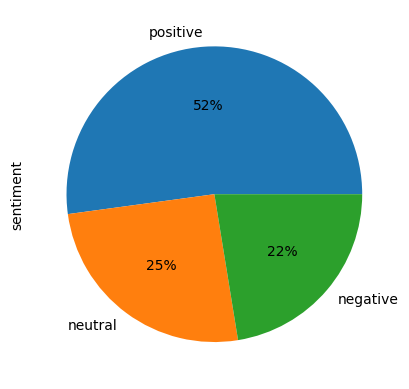

In [ ]:
# Memvisualisasikan distribusi sentimen menggunakan pie chart
data['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# Membuat wordcloud untuk setiap sentimen
stopwords = set(STOPWORDS)

In [ ]:
sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)

positive    2436
neutral     1187
negative    1048
Name: sentiment, dtype: int64


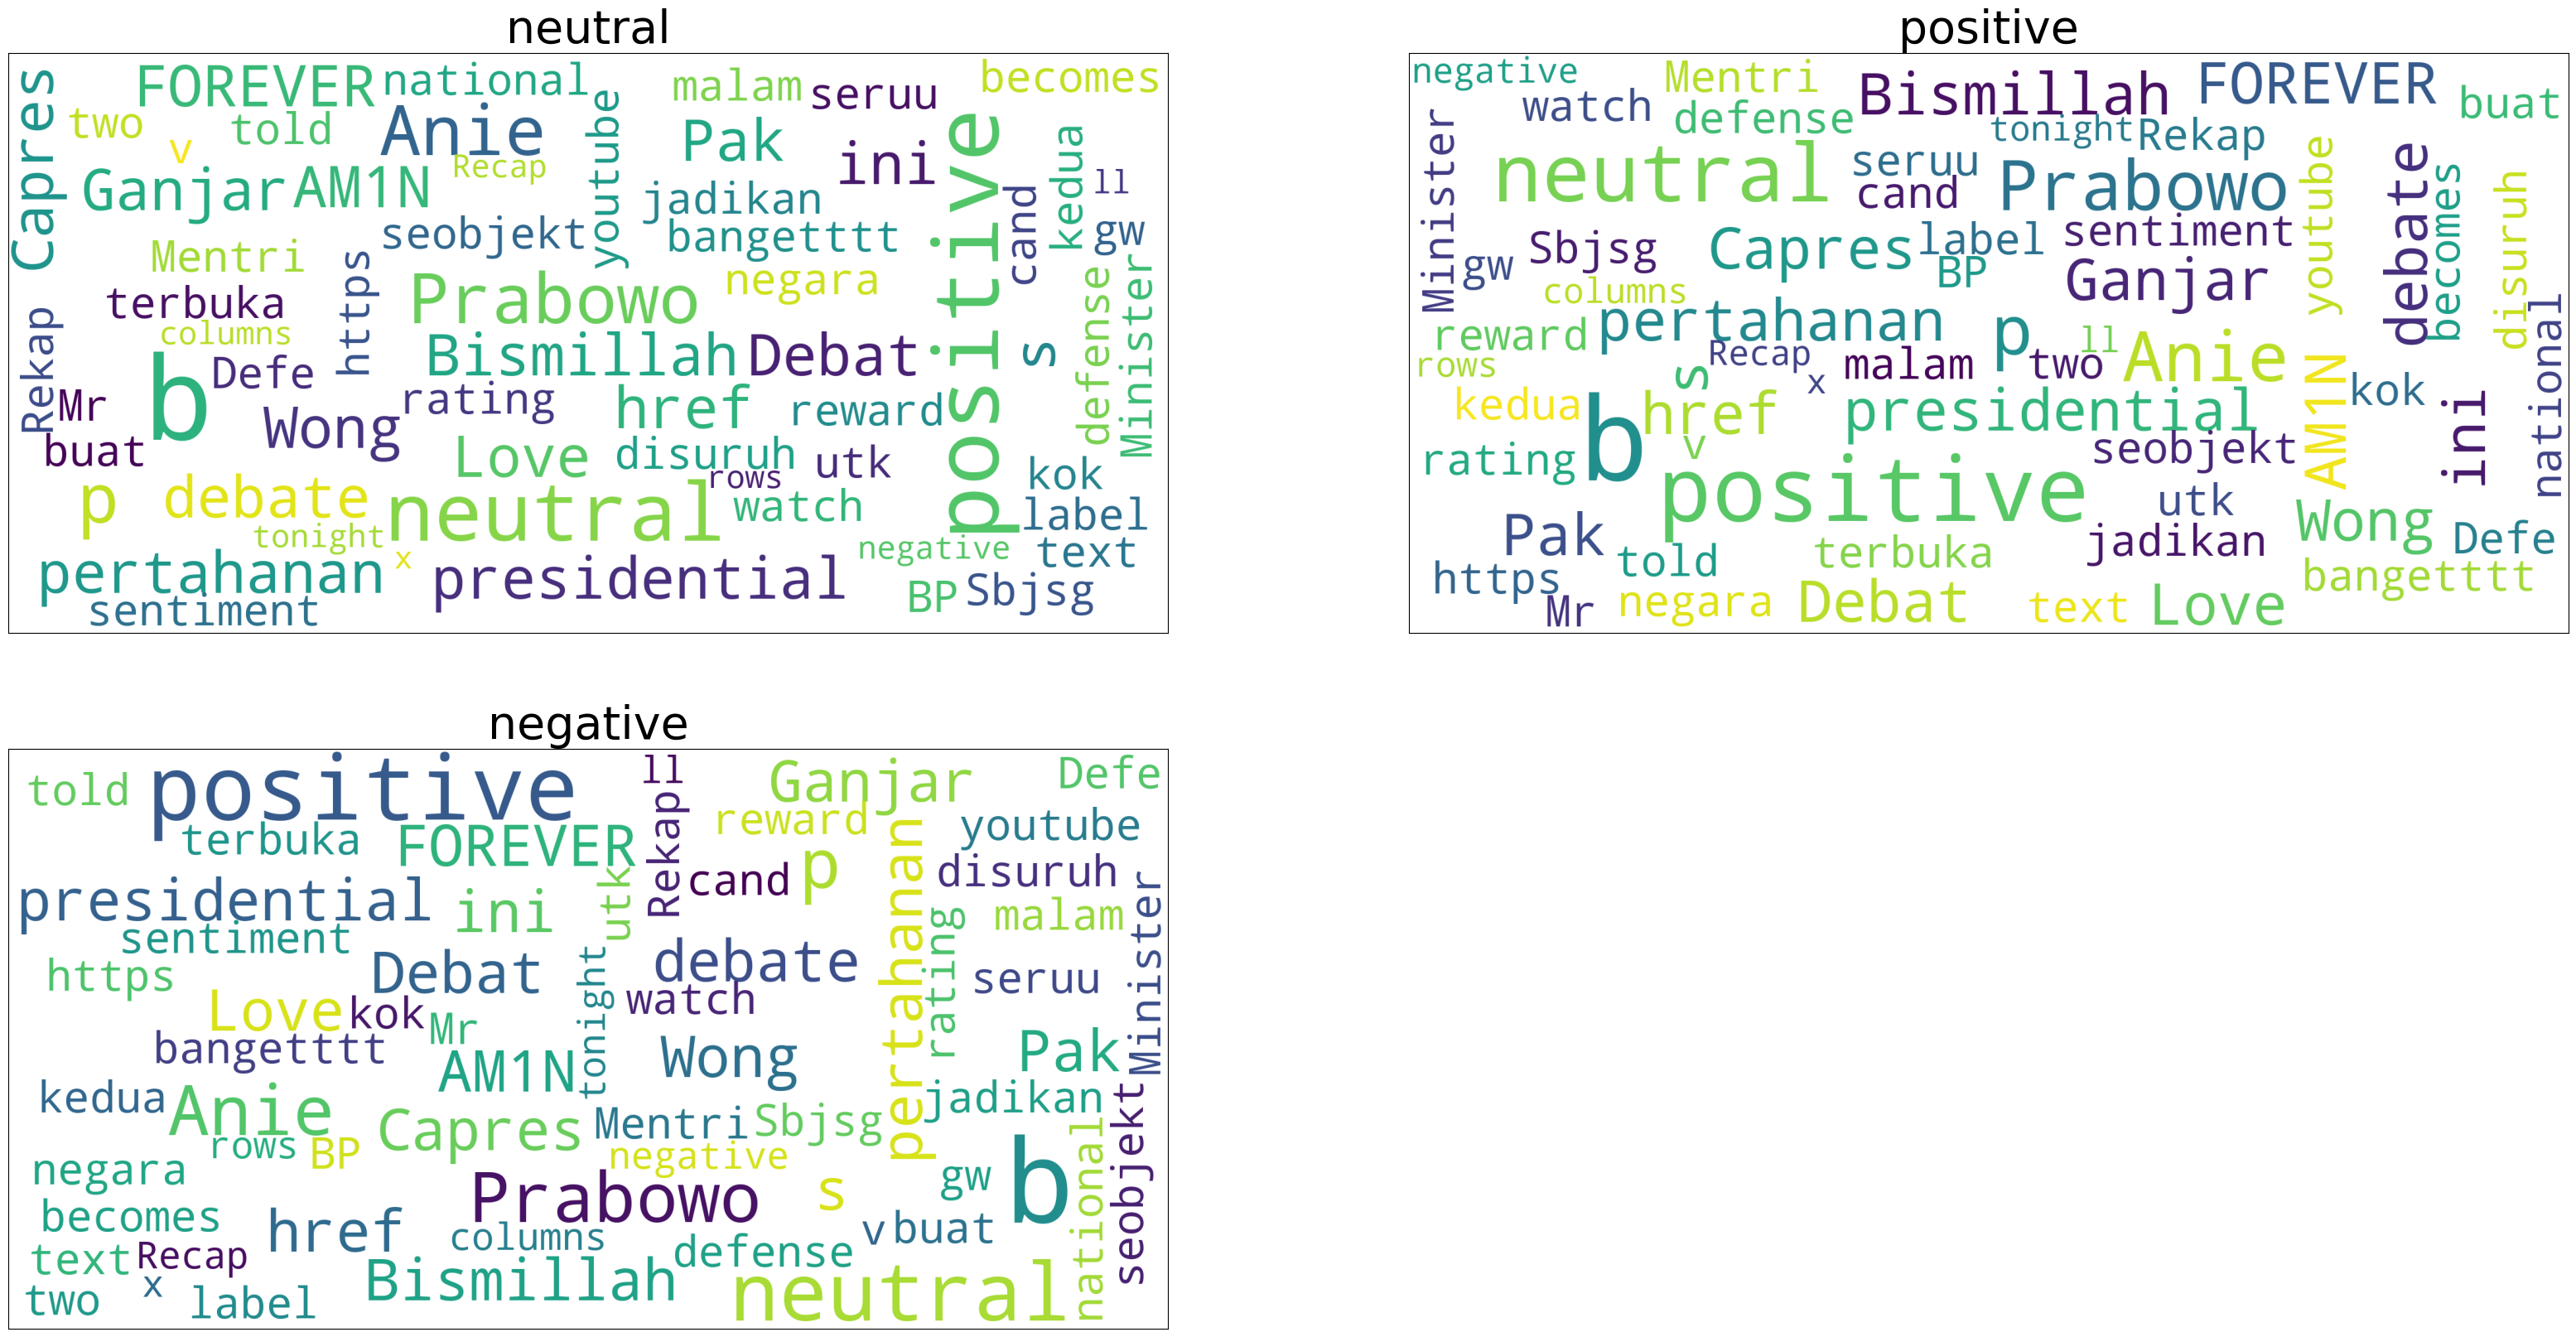

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot 2x2 grid word cloud for each sentiment
plt.figure(figsize=(40,20))

for index, col in enumerate(data['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = data[data['sentiment']==col]
    data1 = df1['label']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)

plt.show()
plt.tight_layout()

## 7. Analisis Kata Kunci

Bagian ini menggunakan library fuzzywuzzy untuk mencari kata-kata yang menyerupai kata-kata tertentu (dalam contoh ini, "ganjar", "anies", dan "prabowo") dalam kolom 'text'. Fungsi find_typo mencari kata-kata yang memiliki rasio kesamaan di atas ambang batas tertentu (default 80) dengan kata-kata yang dicari.

In [ ]:
# # Mencari kata-kata yang menyerupai kata kunci
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Kata-kata yang ingin dicari
words_to_match = ["ganjar", "anies", "prabowo"]

# Fungsi untuk mencari typo
def find_typo(data, column, words_to_match, threshold=80):
    typo_list = []
    for word_to_match in words_to_match:
        for index, row in data.iterrows():
            # Memastikan bahwa data adalah string
            if isinstance(row[column], str):
                ratio = fuzz.ratio(row[column].lower(), word_to_match)
                if ratio >= threshold:
                    typo_list.append((word_to_match, row[column]))
    return typo_list

# Mencari typo dalam kolom 'text'
typo_list = find_typo(data, 'text', words_to_match)

print(typo_list)
count = len(typo_list)
print(count)

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


[('ganjar', 'Ganjar r1'), ('anies', 'Anies❤'), ('anies', 'anies☝️'), ('anies', 'anies 👍'), ('anies', 'anis'), ('anies', 'Anies ❤'), ('anies', 'anis'), ('anies', 'Anis❤'), ('prabowo', 'Prbowo♡'), ('prabowo', 'Prabowo❤'), ('prabowo', 'PRABOWO'), ('prabowo', 'Prabowo❤'), ('prabowo', 'prabowo'), ('prabowo', 'Prabowo \U0001faf6🏼'), ('prabowo', 'Prabowo ❤'), ('prabowo', 'prabowoo'), ('prabowo', 'Prabowo'), ('prabowo', '@prabowo'), ('prabowo', 'KO Prabowo'), ('prabowo', 'praboow'), ('prabowo', 'Prabowo❤'), ('prabowo', 'Prabowo ❤')]
22


## 8. Visualisasi Jumlah Kata Kandidat Capres

### 8.1 Visualisasi Frekuensi Kemunculan Kandidat Capres

Kode ini menghitung jumlah kemunculan kata-kata kunci ("ganjar", "anies", dan "prabowo") dalam kolom 'text', dan memvisualisasikannya menggunakan bar chart.

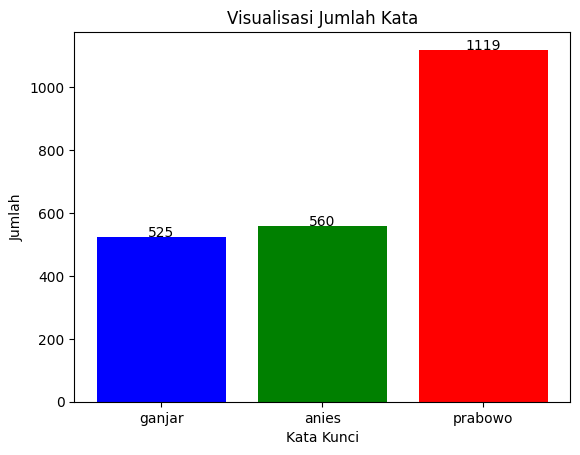

In [ ]:
# Kata-kata yang ingin dicari

# Menghitung jumlah kemunculan kata kunci
word_counts = {}

for word in words_to_match:
    # Menghitung berapa kali kata muncul dalam kolom 'text'
    word_counts[word] = data['text'].str.contains(word, case=False, na=False).sum()

words = [word for word in word_counts.keys()]
counts = [word_counts[word] for word in words]

counts_array = np.array(counts)

# Memvisualisasikan jumlah kemunculan kata kunci menggunakan bar chart
plt.bar(words, counts_array, color=['blue', 'green', 'red'])

for i in range(len(words)):
    plt.text(i, counts_array[i], str(counts_array[i]), ha='center')

plt.xlabel('Kata Kunci')
plt.ylabel('Jumlah')
plt.title('Visualisasi Jumlah Kata')
plt.show()


### 8.2 Visualisasi Distribusi Sentimen untuk Kandidat Capres

Bagian ini memvisualisasikan distribusi sentimen ('positif' dan 'negatif') untuk kata-kata kunci ("ganjar", "anies", dan "prabowo") beserta variasi ejaan yang mirip. Untuk setiap kata kunci, dibuat sebuah pie chart yang menunjukkan persentase sentimen positif dan negatif.

In [ ]:
# Fungsi untuk mencari typo
def find_typo(data, column, words_to_match, threshold=80):
    typo_dict = {word: [] for word in words_to_match}
    for word_to_match in words_to_match:
        for index, row in data.iterrows():
            ratio = fuzz.ratio(row[column].lower(), word_to_match)
            if ratio >= threshold:
                typo_dict[word_to_match].append(row[column])
    return typo_dict

# Mencari typo dalam kolom 'text'
typo_dict = find_typo(data, 'text', words_to_match)

# Menghitung distribusi sentimen untuk kata kunci dan kata-kata yang mirip
sentiment_counts = {}

for word, similar_words in typo_dict.items():
    # Menggabungkan kata asli dan kata-kata yang mirip
    all_words = [word] + similar_words
    # Mencari frekuensi sentimen dari kata-kata asli dan kata-kata yang mirip
    sentiment_counts[word] = data[data['text'].str.contains('|'.join(all_words), case=False)].groupby('sentiment').size()

print(sentiment_counts)

{'ganjar': sentiment
negative     88
neutral      68
positive    369
dtype: int64, 'anies': sentiment
negative    291
neutral     246
positive    748
dtype: int64, 'prabowo': sentiment
negative    260
neutral     264
positive    598
dtype: int64}


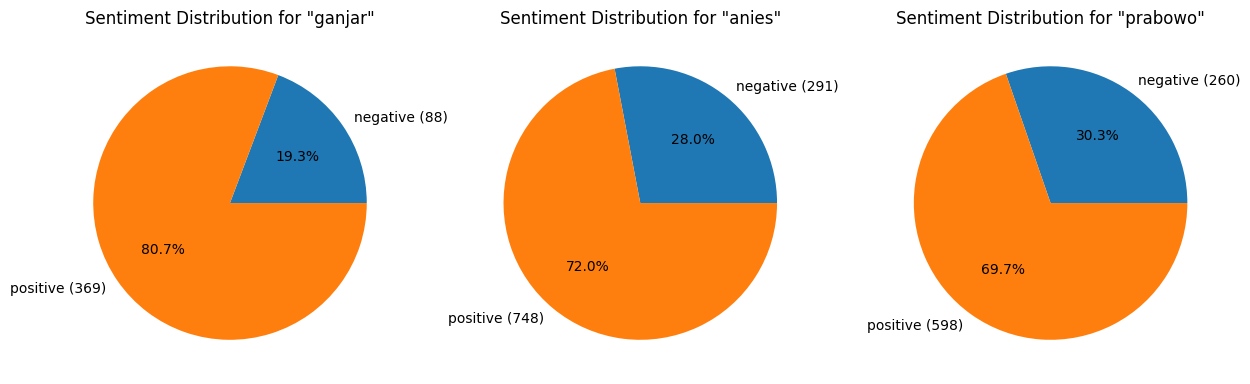

In [ ]:
# Memvisualisasikan distribusi sentimen untuk setiap kata kunci menggunakan pie chart
fig, axs = plt.subplots(1, len(sentiment_counts), figsize=(15,6))

for ax, (word, sentiment_count) in zip(axs, sentiment_counts.items()):
    # Hanya ambil sentimen 'positive' dan 'negative'
    sentiment_count = sentiment_count[sentiment_count.index.isin(['positive', 'negative'])]

    ax.pie(sentiment_count, labels=[f'{label} ({count})' for label, count in zip(sentiment_count.index, sentiment_count)], autopct='%1.1f%%')
    ax.set_title(f'Sentiment Distribution for "{word}"')

plt.show()

### 8.3 Visualisasi Jumlah Sentimen Positif dan Negatif untuk Kandidat Capres

Kode ini memvisualisasikan jumlah sentimen positif dan negatif untuk kata-kata kunci ("ganjar", "anies", dan "prabowo") menggunakan bar chart.

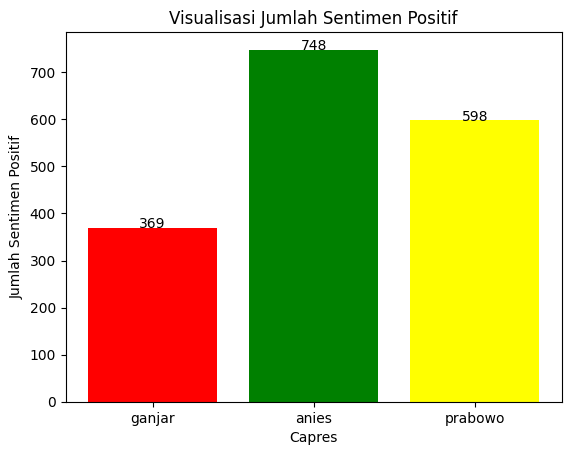

In [ ]:

# Membuat list dari kata kunci dan jumlah sentimen positif
words = [word for word in sentiment_counts.keys()]
positive_counts = [sentiment_counts[word]['positive'] for word in words]

# Membuat array dari jumlah sentimen positif
counts = np.array(positive_counts)

# Membuat bar plot dengan warna yang berbeda untuk setiap bar
colors = ['red', 'green', 'yellow']
plt.bar(words, counts, color=colors)

# Menambahkan angka di atas setiap bar
for i in range(len(words)):
    plt.text(i, counts[i], str(counts[i]), ha='center')

plt.xlabel('Capres')
plt.ylabel('Jumlah Sentimen Positif')
plt.title('Visualisasi Jumlah Sentimen Positif')
plt.show()

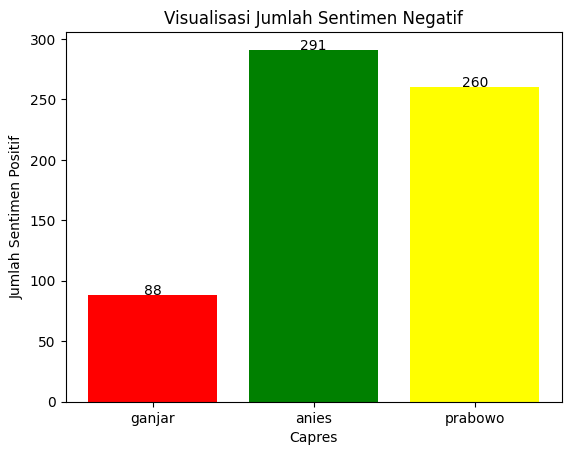

In [ ]:
# Membuat list dari kata kunci dan jumlah sentimen Negatif
words = [word for word in sentiment_counts.keys()]
positive_counts = [sentiment_counts[word]['negative'] for word in words]

# Membuat array dari jumlah sentimen positif
counts = np.array(positive_counts)

# Membuat bar plot dengan warna yang berbeda untuk setiap bar
colors = ['red', 'green', 'yellow']
plt.bar(words, counts, color=colors)

# Menambahkan angka di atas setiap bar
for i in range(len(words)):
    plt.text(i, counts[i], str(counts[i]), ha='center')

plt.xlabel('Capres')
plt.ylabel('Jumlah Sentimen Positif')
plt.title('Visualisasi Jumlah Sentimen Negatif')
plt.show()


## 9. Preprocessing Lanjutan

Bagian ini melakukan pemrosesan teks dengan membersihkan teks dari karakter non-alfanumerik, menghapus stopwords, dan melakukan stemming. Fungsi preprocess melakukan semua tugas ini dan diterapkan pada kolom 'text' dalam dataset.

In [ ]:
# Membuat stemmer dan stopword remover untuk pemrosesan teks
factory_stem = StemmerFactory()
stemmer = factory_stem.create_stemmer()
factory_stop = StopWordRemoverFactory()
stopword = factory_stop.create_stop_word_remover()

def preprocess(text):
    # Pembersihan data
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'^b\s+', '', text)
    text = text.lower()

    # Tokenisasi
    text = word_tokenize(text)

    # Stopword removal
    text = stopword.remove(' '.join(text))

    # Stemming
    text = stemmer.stem(text)

    return text


data['text'] = data['text'].apply(preprocess)


<ipython-input-33-ffd3ed6a81be>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(preprocess)


In [ ]:
data.sample(5)

text  \
4358  pak anis lebih pantas banding capres yg karna ...   
4087                   gak yg bagus banget tiga2nya aja   
1992                                   bagus debat 2019   
4488    aja ngerti yg sampai sama pak prabowo jar jarrr   
3375                          no 1 pantas jadi presiden   

                                                  label sentiment  
4358  Mr Anis is more deserving than the other presi...  positive  
4087  There aren t any really good ones just three o...  positive  
1992                           b Still good debate 2019  positive  
4488  b I just understand what Pak Prabowo said jar ...   neutral  
3375                    b No 1 deserves to be president  negative

## 10. Pembuatan Model Machine Learning

Kode ini membuat model machine learning untuk melakukan klasifikasi sentimen pada teks. Data dibagi menjadi set latih dan set uji menggunakan train_test_split. Kemudian, model pipeline dibuat dengan TfidfVectorizer untuk mengekstrak fitur dari teks dan RandomForestClassifier untuk melakukan klasifikasi. Model dilatih pada set latih, dan performa model dievaluasi pada set uji dengan mengukur akurasi, membuat laporan klasifikasi, dan memvisualisasikan confusion matrix.

In [ ]:
# Membagi data menjadi set latih dan set uji
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'], test_size=0.2, random_state=42)

In [ ]:
# Memeriksa ukuran set latih dan set uji
X_train.shape, X_test.shape

((3736,), (935,))

### SVM

In [ ]:
from sklearn.svm import SVC
# Ubah set stopwords menjadi list
stopwords_list = list(stopwords)

clf = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords_list)),
                ('clf', SVC(kernel='linear', C=1.0, gamma='auto'))])

# Melatih model
clf.fit(X_train, y_train)

# Membuat prediksi
predictions = clf.predict(X_test)

# Mencetak skor akurasi
print("Accuracy:", accuracy_score(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


Accuracy: 0.6983957219251337


In [ ]:
# Mencetak laporan klasifikasi
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.63      0.44      0.52       208
     neutral       0.68      0.61      0.64       241
    positive       0.73      0.85      0.78       486

    accuracy                           0.70       935
   macro avg       0.68      0.63      0.65       935
weighted avg       0.69      0.70      0.69       935



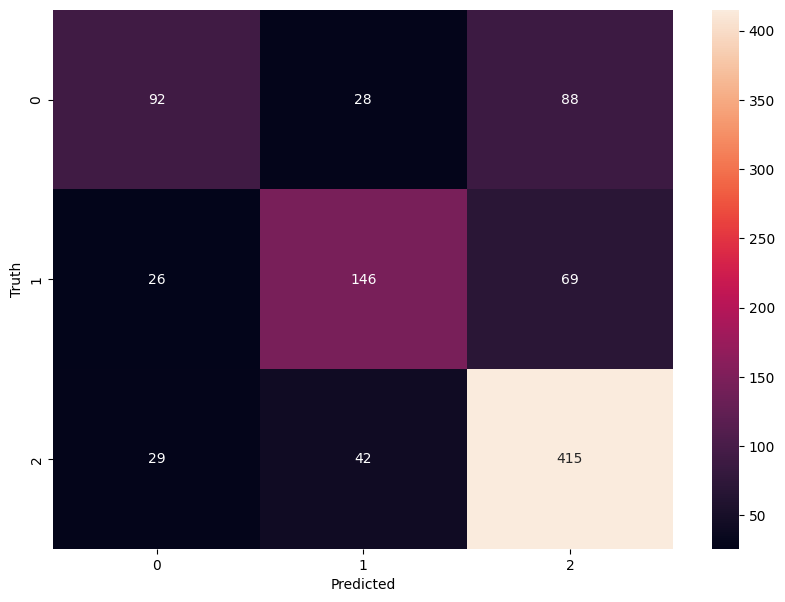

In [ ]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, predictions)

# Membuat plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
# Confusion matrix pada data uji
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, predictions))

# Confusion matrix pada data latih
print("Confusion Matrix (Training Set):")
train_predictions = clf.predict(X_train)
print(confusion_matrix(y_train, train_predictions))

Confusion Matrix (Test Set):
[[ 92  28  88]
 [ 26 146  69]
 [ 29  42 415]]
Confusion Matrix (Training Set):
[[ 626   33  181]
 [  26  807  113]
 [  24   19 1907]]


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'cou

Cross-Validation Scores: [0.66042781 0.66666667 0.65461847 0.66131191 0.67737617]
Mean Cross-Validation Score: 0.6640802067449836
Train Accuracy: 0.8940042826552462
Test Accuracy: 0.6983957219251337


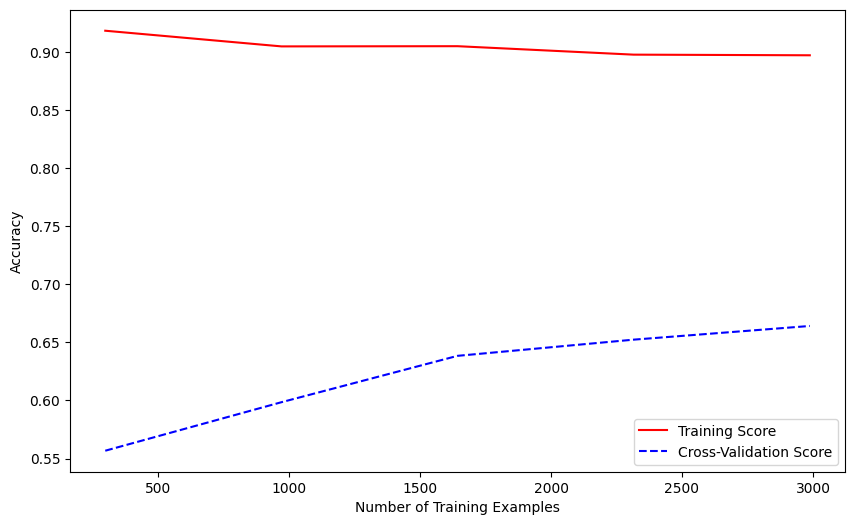

In [ ]:
from sklearn.model_selection import cross_val_score, learning_curve
import matplotlib.pyplot as plt

# Cross-Validation Score
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

# Akurasi pada Data Latih dan Data Uji
train_accuracy = clf.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, predictions)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'r-', label='Training Score')
plt.plot(train_sizes, test_mean, 'b--', label='Cross-Validation Score')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

#### Visualisasi

positive    2436
neutral     1187
negative    1048
Name: sentiment, dtype: int64


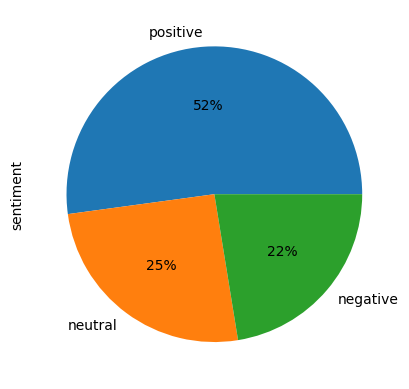

In [ ]:
# Memvisualisasikan distribusi sentimen menggunakan pie chart
data['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# Membuat wordcloud untuk setiap sentimen
stopwords = set(STOPWORDS)


sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)

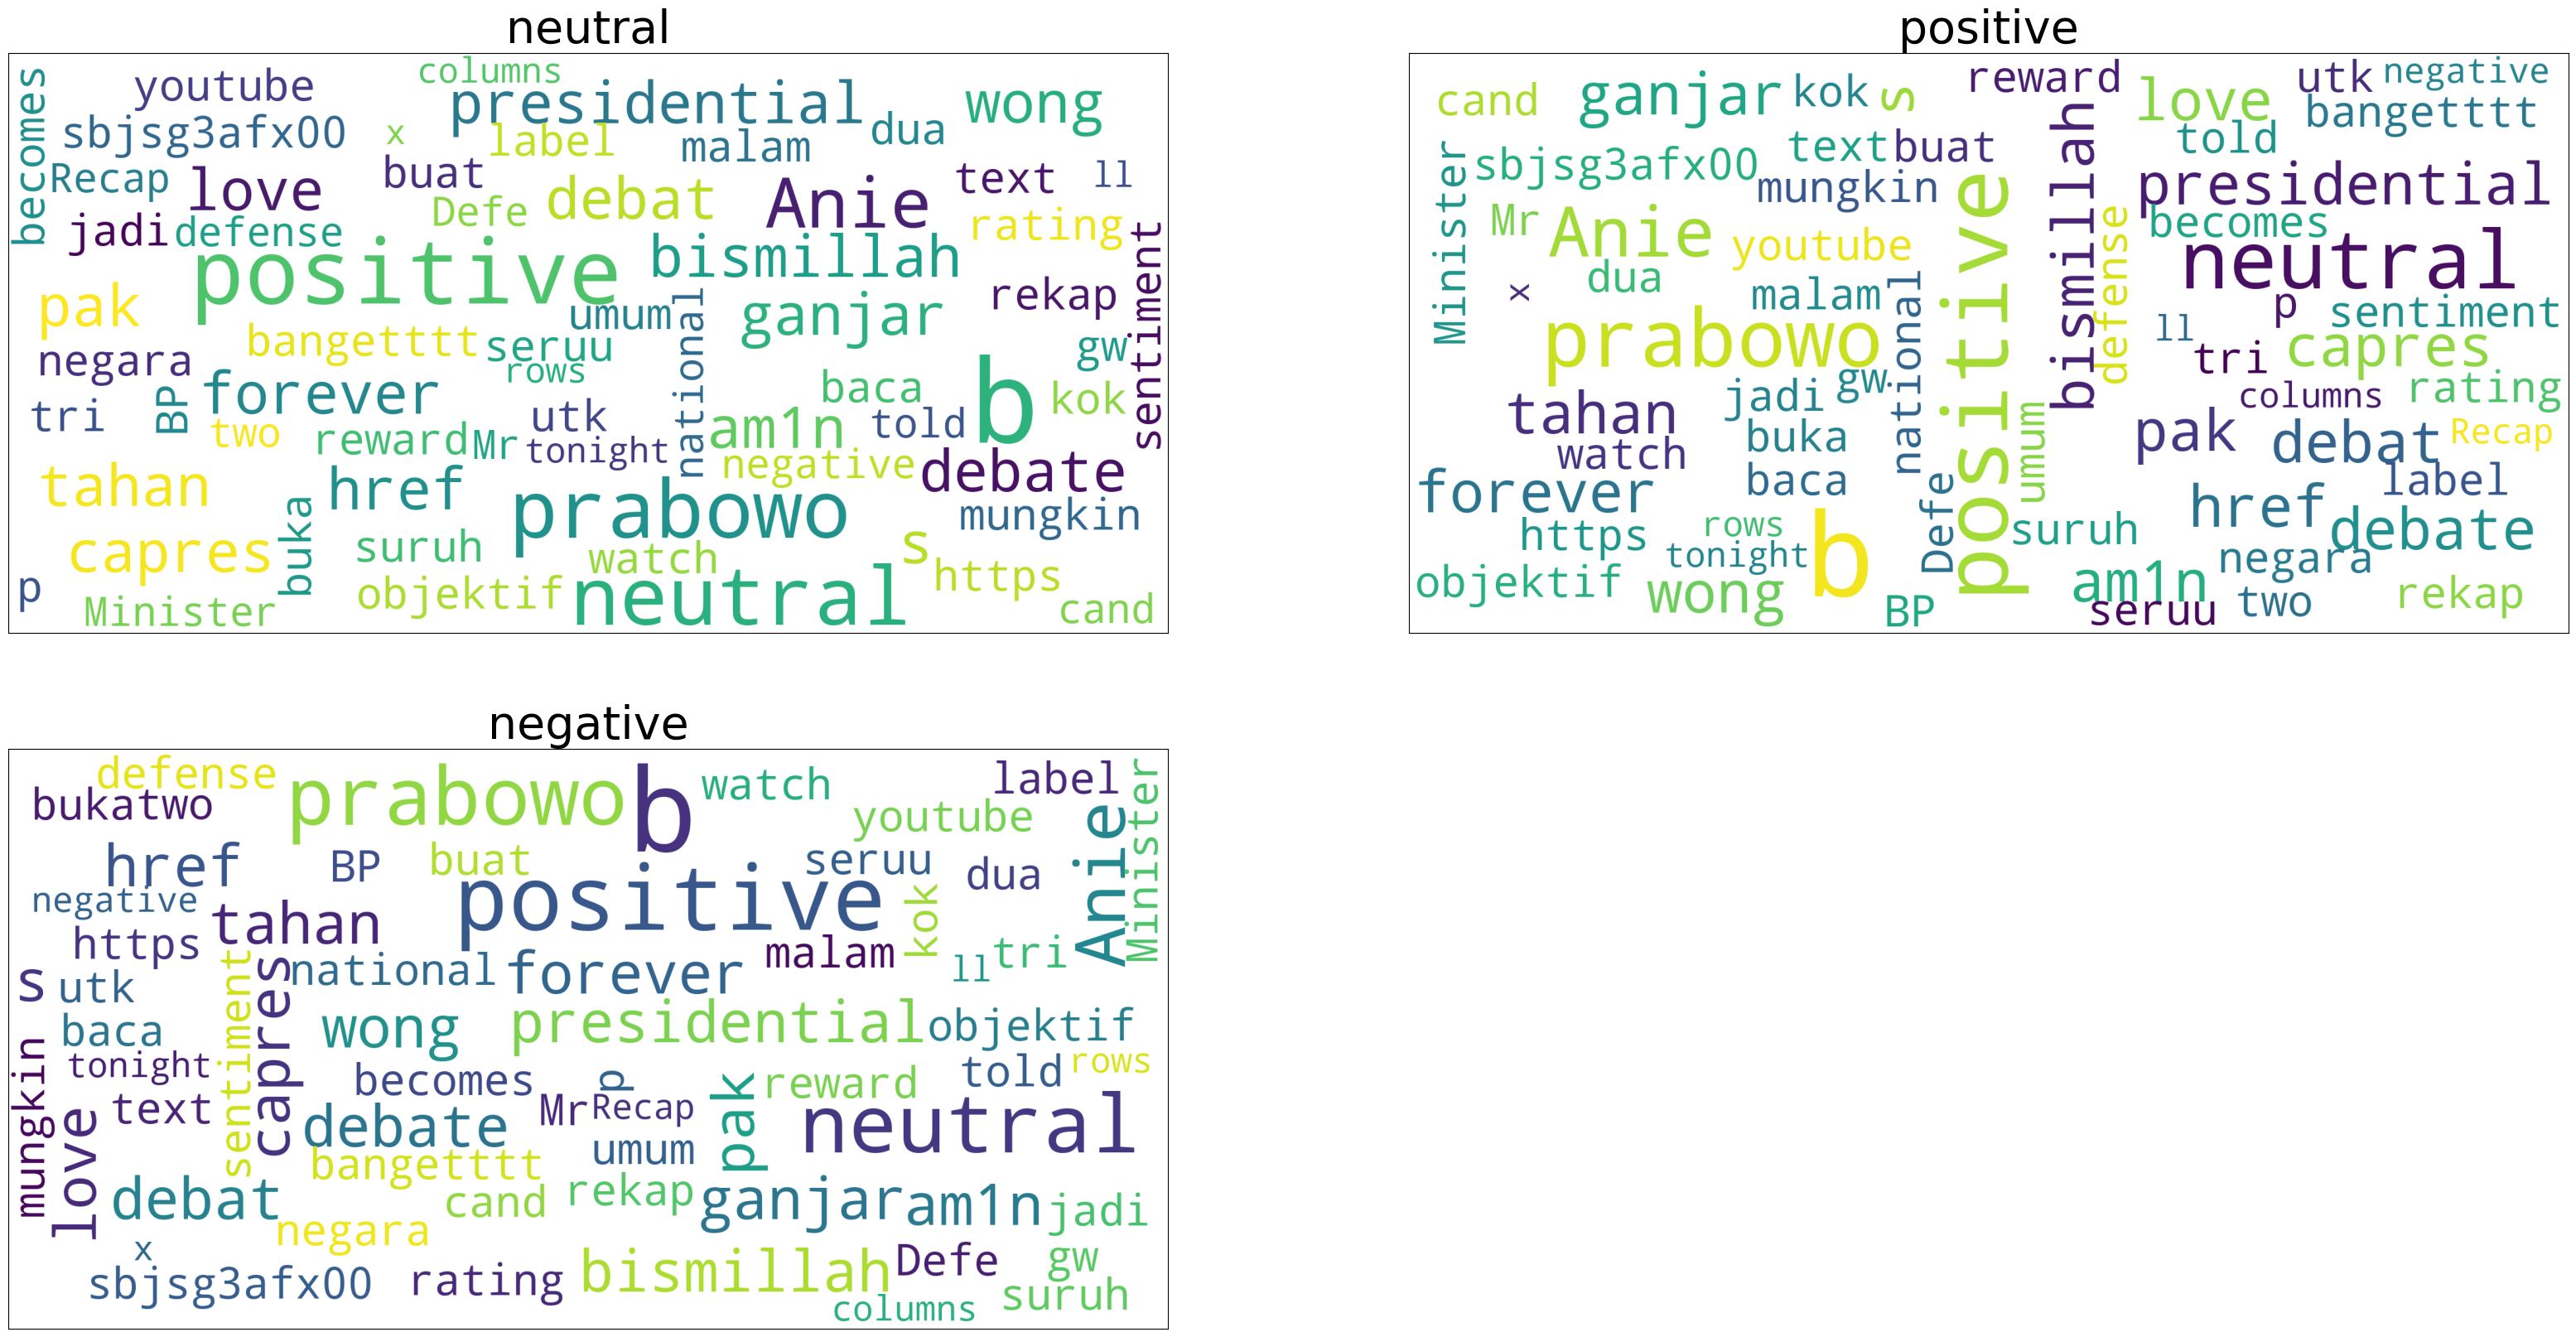

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot 2x2 grid word cloud for each sentiment
plt.figure(figsize=(40,20))

for index, col in enumerate(data['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = data[data['sentiment']==col]
    data1 = df1['label']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)

plt.show()
plt.tight_layout()


In [ ]:

# # Mencari kata-kata yang menyerupai kata kunci
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Kata-kata yang ingin dicari
words_to_match = ["ganjar", "anies", "prabowo"]

# Fungsi untuk mencari typo
def find_typo(data, column, words_to_match, threshold=80):
    typo_list = []
    for word_to_match in words_to_match:
        for index, row in data.iterrows():
            # Memastikan bahwa data adalah string
            if isinstance(row[column], str):
                ratio = fuzz.ratio(row[column].lower(), word_to_match)
                if ratio >= threshold:
                    typo_list.append((word_to_match, row[column]))
    return typo_list

# Mencari typo dalam kolom 'text'
typo_list = find_typo(data, 'text', words_to_match)

print(typo_list)
count = len(typo_list)
print(count)


[('ganjar', 'ganjar'), ('ganjar', 'ganjar r1'), ('anies', 'anies'), ('anies', 'anies'), ('anies', 'anies'), ('anies', 'anis'), ('anies', 'anies'), ('anies', 'anis'), ('anies', 'anies'), ('anies', 'anis'), ('prabowo', 'prbowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowoo'), ('prabowo', 'prabowo'), ('prabowo', 'prabawo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'ko prabowo'), ('prabowo', 'praboow'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo')]
29


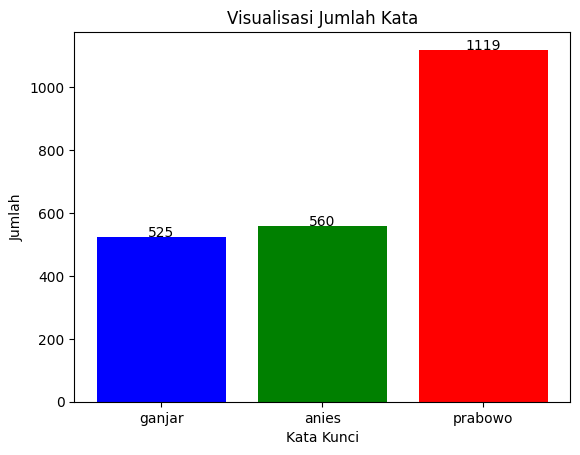

In [ ]:
# Kata-kata yang ingin dicari

# Menghitung jumlah kemunculan kata kunci
word_counts = {}

for word in words_to_match:
    # Menghitung berapa kali kata muncul dalam kolom 'text'
    word_counts[word] = data['text'].str.contains(word, case=False, na=False).sum()

words = [word for word in word_counts.keys()]
counts = [word_counts[word] for word in words]

counts_array = np.array(counts)

# Memvisualisasikan jumlah kemunculan kata kunci menggunakan bar chart
plt.bar(words, counts_array, color=['blue', 'green', 'red'])

for i in range(len(words)):
    plt.text(i, counts_array[i], str(counts_array[i]), ha='center')

plt.xlabel('Kata Kunci')
plt.ylabel('Jumlah')
plt.title('Visualisasi Jumlah Kata')
plt.show()


In [ ]:
# Fungsi untuk mencari typo
def find_typo(data, column, words_to_match, threshold=80):
    typo_dict = {word: [] for word in words_to_match}
    for word_to_match in words_to_match:
        for index, row in data.iterrows():
            ratio = fuzz.ratio(row[column].lower(), word_to_match)
            if ratio >= threshold:
                typo_dict[word_to_match].append(row[column])
    return typo_dict

# Mencari typo dalam kolom 'text'
typo_dict = find_typo(data, 'text', words_to_match)

# Menghitung distribusi sentimen untuk kata kunci dan kata-kata yang mirip
sentiment_counts = {}

for word, similar_words in typo_dict.items():
    # Menggabungkan kata asli dan kata-kata yang mirip
    all_words = [word] + similar_words
    # Mencari frekuensi sentimen dari kata-kata asli dan kata-kata yang mirip
    sentiment_counts[word] = data[data['text'].str.contains('|'.join(all_words), case=False)].groupby('sentiment').size()

print(sentiment_counts)


{'ganjar': sentiment
negative     88
neutral      68
positive    369
dtype: int64, 'anies': sentiment
negative    290
neutral     246
positive    748
dtype: int64, 'prabowo': sentiment
negative    260
neutral     265
positive    598
dtype: int64}


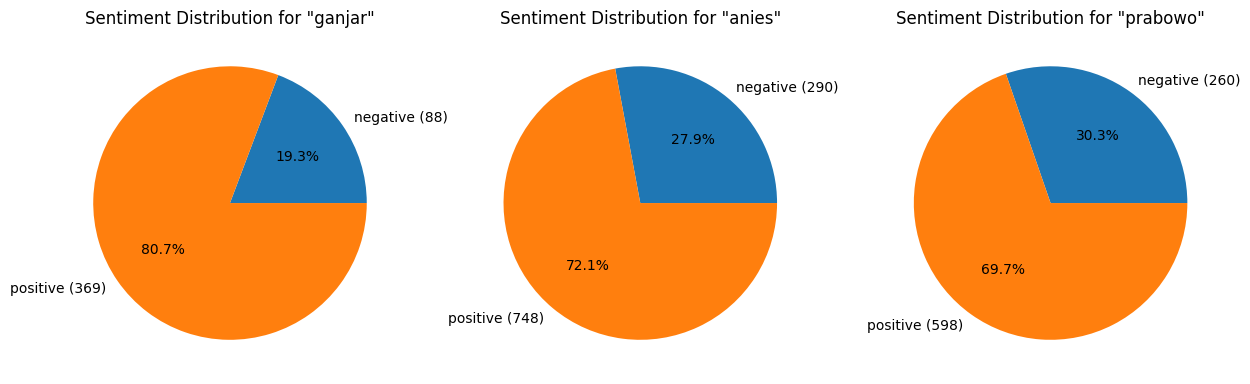

In [ ]:
# Memvisualisasikan distribusi sentimen untuk setiap kata kunci menggunakan pie chart
fig, axs = plt.subplots(1, len(sentiment_counts), figsize=(15,6))

for ax, (word, sentiment_count) in zip(axs, sentiment_counts.items()):
    # Hanya ambil sentimen 'positive' dan 'negative'
    sentiment_count = sentiment_count[sentiment_count.index.isin(['positive', 'negative'])]

    ax.pie(sentiment_count, labels=[f'{label} ({count})' for label, count in zip(sentiment_count.index, sentiment_count)], autopct='%1.1f%%')
    ax.set_title(f'Sentiment Distribution for "{word}"')

plt.show()


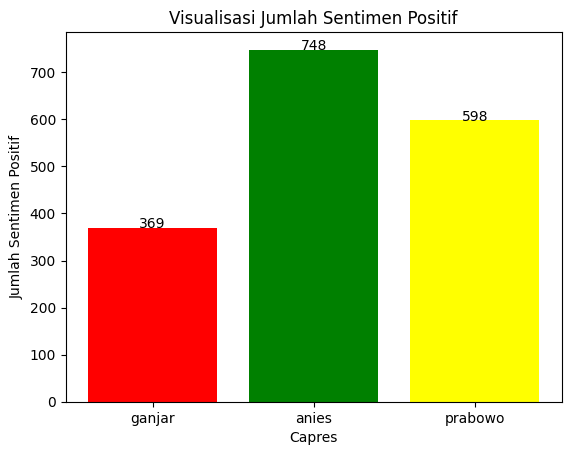

In [ ]:
# Membuat list dari kata kunci dan jumlah sentimen positif
words = [word for word in sentiment_counts.keys()]
positive_counts = [sentiment_counts[word]['positive'] for word in words]

# Membuat array dari jumlah sentimen positif
counts = np.array(positive_counts)

# Membuat bar plot dengan warna yang berbeda untuk setiap bar
colors = ['red', 'green', 'yellow']
plt.bar(words, counts, color=colors)

# Menambahkan angka di atas setiap bar
for i in range(len(words)):
    plt.text(i, counts[i], str(counts[i]), ha='center')

plt.xlabel('Capres')
plt.ylabel('Jumlah Sentimen Positif')
plt.title('Visualisasi Jumlah Sentimen Positif')
plt.show()

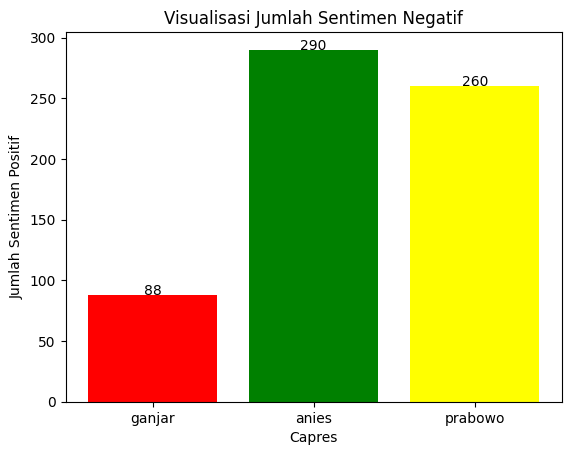

In [ ]:

# Membuat list dari kata kunci dan jumlah sentimen Negatif
words = [word for word in sentiment_counts.keys()]
positive_counts = [sentiment_counts[word]['negative'] for word in words]

# Membuat array dari jumlah sentimen positif
counts = np.array(positive_counts)

# Membuat bar plot dengan warna yang berbeda untuk setiap bar
colors = ['red', 'green', 'yellow']
plt.bar(words, counts, color=colors)

# Menambahkan angka di atas setiap bar
for i in range(len(words)):
    plt.text(i, counts[i], str(counts[i]), ha='center')

plt.xlabel('Capres')
plt.ylabel('Jumlah Sentimen Positif')
plt.title('Visualisasi Jumlah Sentimen Negatif')
plt.show()


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Ubah set stopwords menjadi list
stopwords_list = list(stopwords)

clf = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords_list)),
                ('clf', MultinomialNB(alpha=0.5, fit_prior=True))])

# Melatih model
clf.fit(X_train, y_train)

# Membuat prediksi
predictions = clf.predict(X_test)

# Mencetak skor akurasi
print("Accuracy:", accuracy_score(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


Accuracy: 0.5689839572192513


In [ ]:
# Mencetak laporan klasifikasi
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.82      0.07      0.12       208
     neutral       0.86      0.16      0.27       241
    positive       0.55      0.99      0.71       486

    accuracy                           0.57       935
   macro avg       0.75      0.40      0.37       935
weighted avg       0.69      0.57      0.46       935



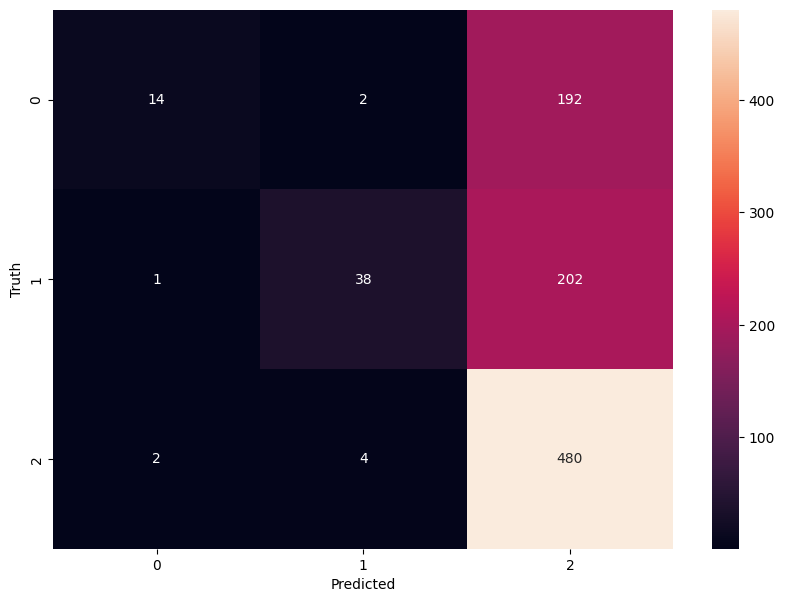

In [ ]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, predictions)

# Membuat plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
# Confusion matrix pada data uji
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, predictions))

# Confusion matrix pada data latih
print("Confusion Matrix (Training Set):")
train_predictions = clf.predict(X_train)
print(confusion_matrix(y_train, train_predictions))

Confusion Matrix (Test Set):
[[ 14   2 192]
 [  1  38 202]
 [  2   4 480]]
Confusion Matrix (Training Set):
[[ 292   14  534]
 [   2  398  546]
 [   1   14 1935]]


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'cou

Cross-Validation Scores: [0.55213904 0.56626506 0.55555556 0.55823293 0.5729585 ]
Mean Cross-Validation Score: 0.5610302171251853
Train Accuracy: 0.7026231263383298
Test Accuracy: 0.5689839572192513


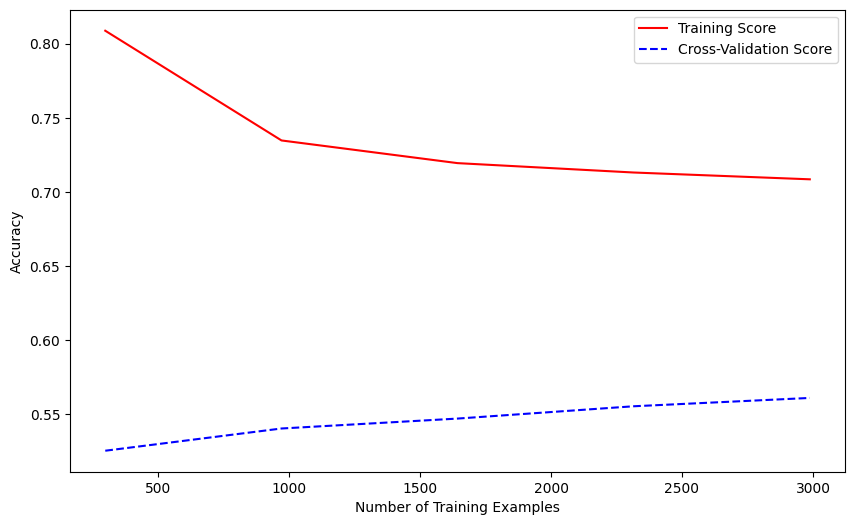

In [ ]:
from sklearn.model_selection import cross_val_score, learning_curve
import matplotlib.pyplot as plt

# Cross-Validation Score
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

# Akurasi pada Data Latih dan Data Uji
train_accuracy = clf.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, predictions)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'r-', label='Training Score')
plt.plot(train_sizes, test_mean, 'b--', label='Cross-Validation Score')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

#### Visualisasi

positive    2436
neutral     1187
negative    1048
Name: sentiment, dtype: int64


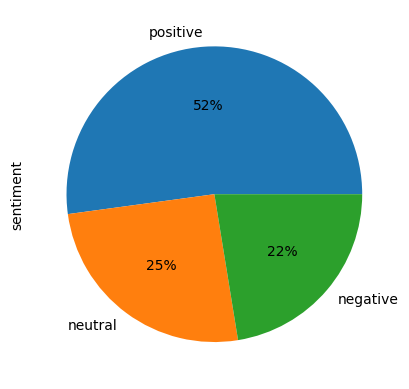

In [ ]:
# Memvisualisasikan distribusi sentimen menggunakan pie chart
data['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# Membuat wordcloud untuk setiap sentimen
stopwords = set(STOPWORDS)


sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)

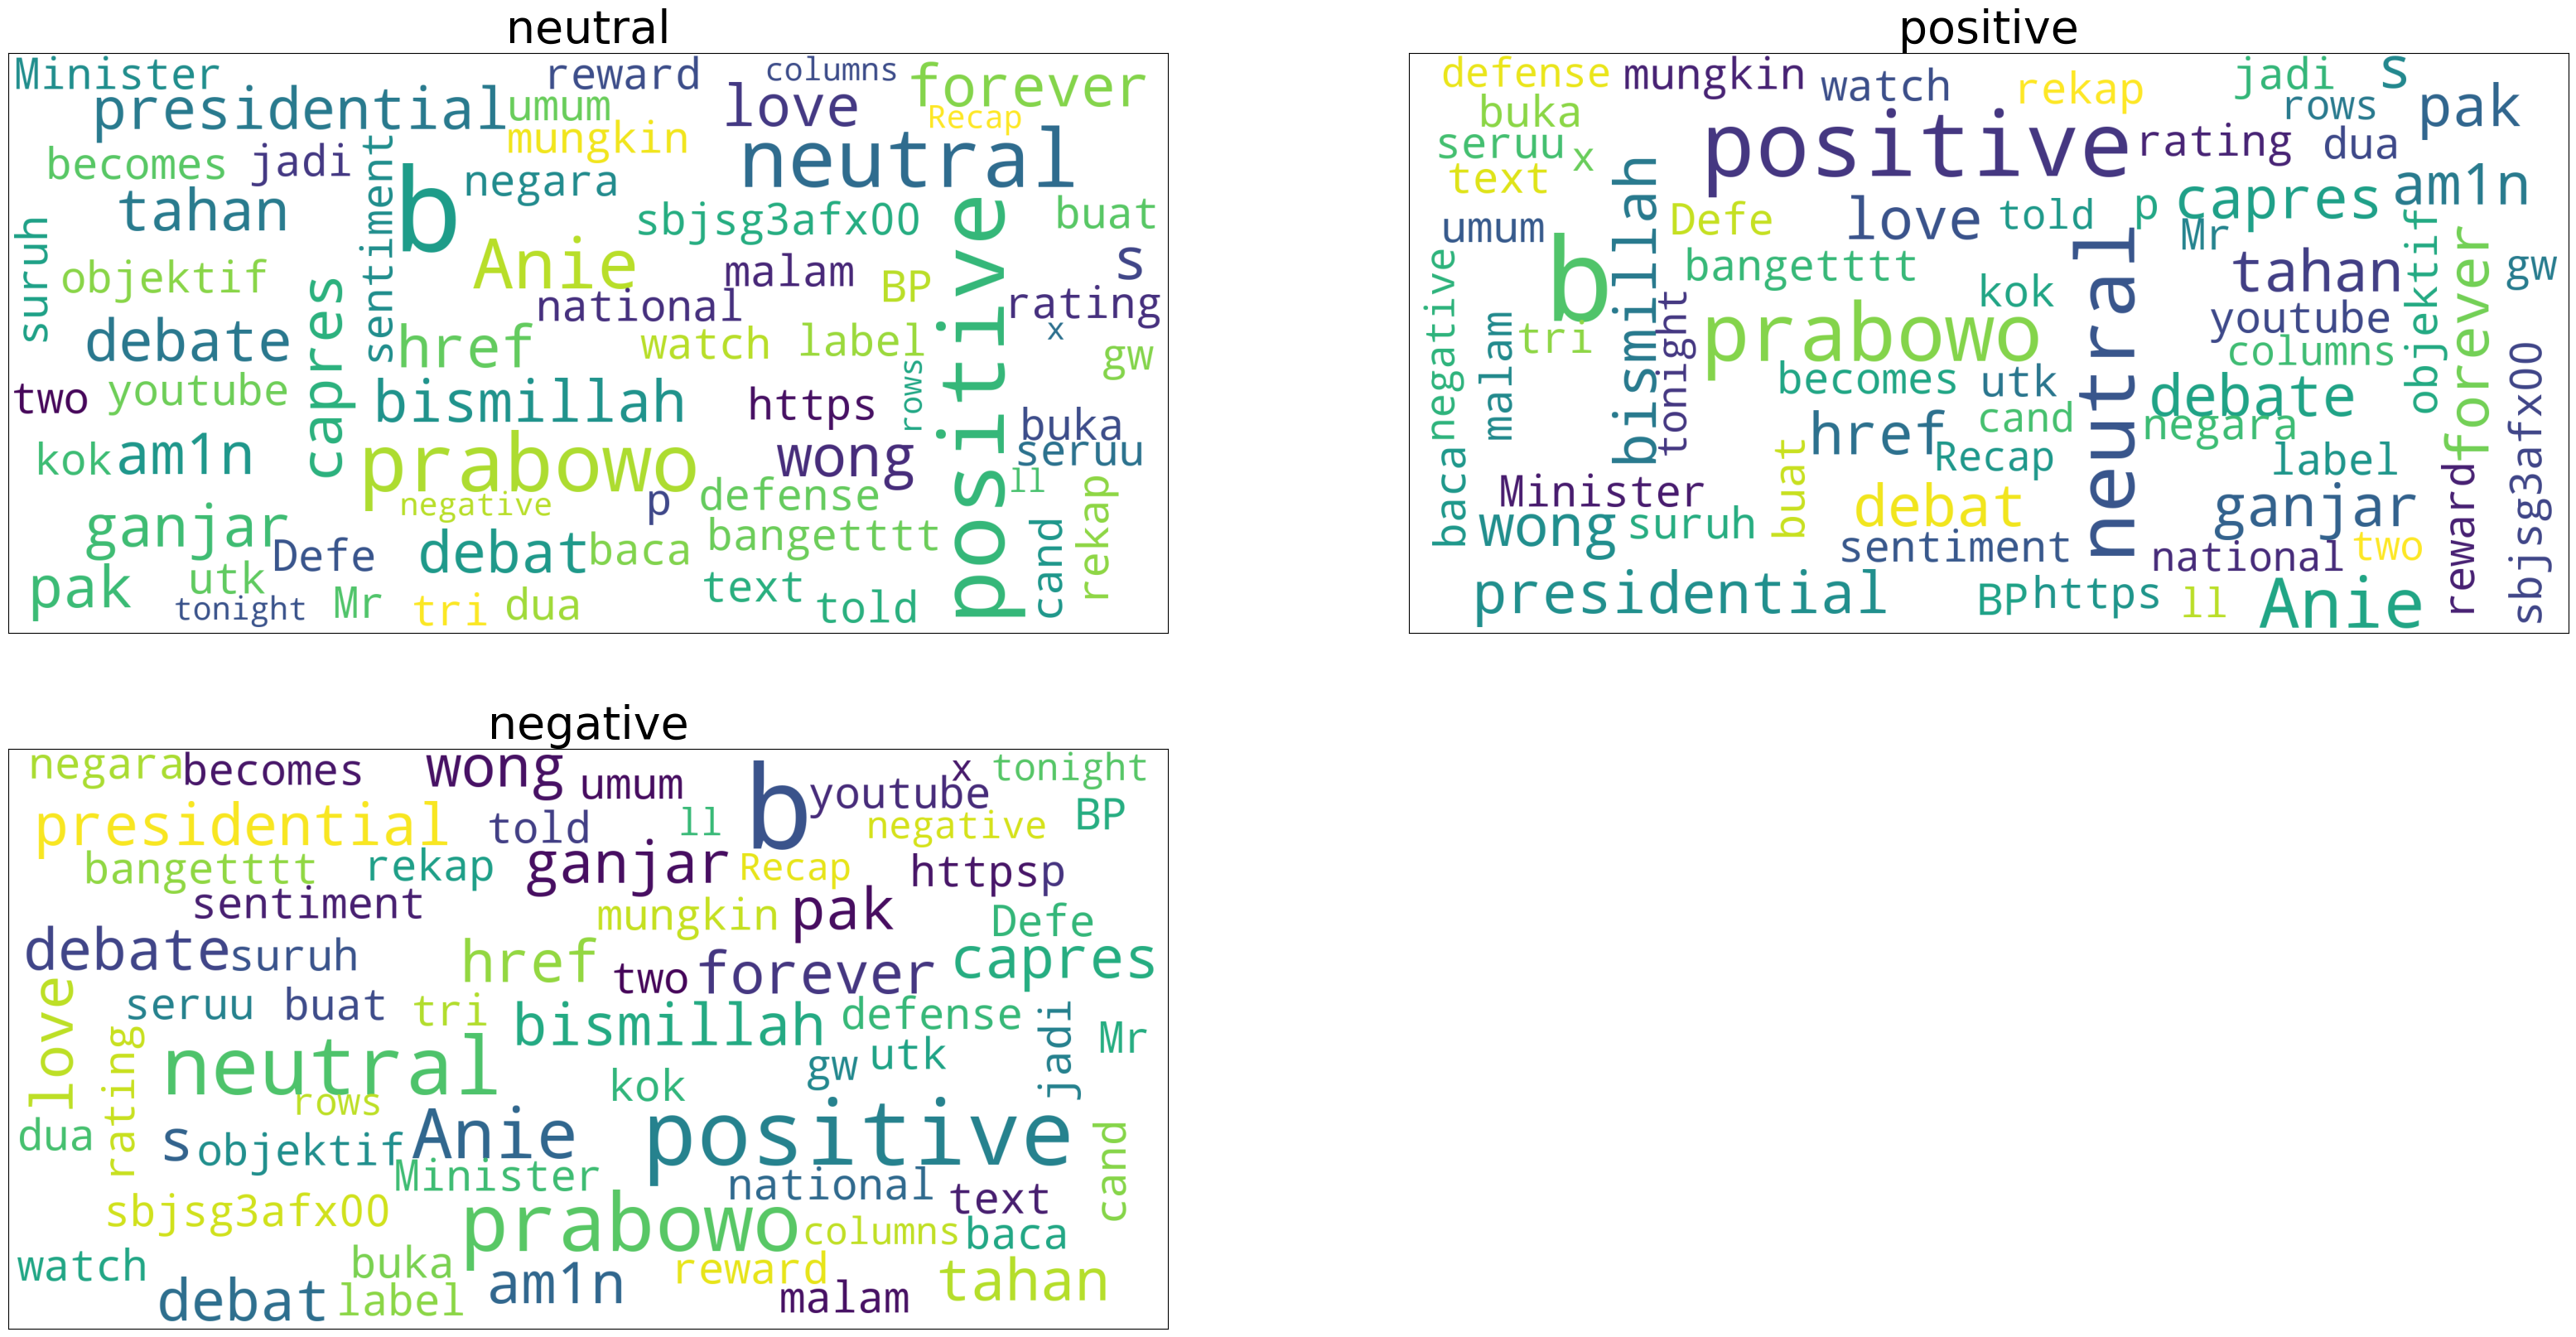

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot 2x2 grid word cloud for each sentiment
plt.figure(figsize=(40,20))

for index, col in enumerate(data['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = data[data['sentiment']==col]
    data1 = df1['label']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)

plt.show()
plt.tight_layout()


In [ ]:

# # Mencari kata-kata yang menyerupai kata kunci
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Kata-kata yang ingin dicari
words_to_match = ["ganjar", "anies", "prabowo"]

# Fungsi untuk mencari typo
def find_typo(data, column, words_to_match, threshold=80):
    typo_list = []
    for word_to_match in words_to_match:
        for index, row in data.iterrows():
            # Memastikan bahwa data adalah string
            if isinstance(row[column], str):
                ratio = fuzz.ratio(row[column].lower(), word_to_match)
                if ratio >= threshold:
                    typo_list.append((word_to_match, row[column]))
    return typo_list

# Mencari typo dalam kolom 'text'
typo_list = find_typo(data, 'text', words_to_match)

print(typo_list)
count = len(typo_list)
print(count)


[('ganjar', 'ganjar'), ('ganjar', 'ganjar r1'), ('anies', 'anies'), ('anies', 'anies'), ('anies', 'anies'), ('anies', 'anis'), ('anies', 'anies'), ('anies', 'anis'), ('anies', 'anies'), ('anies', 'anis'), ('prabowo', 'prbowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowoo'), ('prabowo', 'prabowo'), ('prabowo', 'prabawo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'ko prabowo'), ('prabowo', 'praboow'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo')]
29


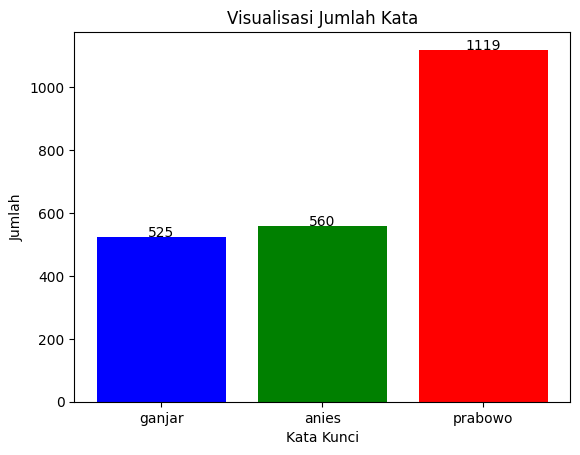

In [ ]:
# Kata-kata yang ingin dicari

# Menghitung jumlah kemunculan kata kunci
word_counts = {}

for word in words_to_match:
    # Menghitung berapa kali kata muncul dalam kolom 'text'
    word_counts[word] = data['text'].str.contains(word, case=False, na=False).sum()

words = [word for word in word_counts.keys()]
counts = [word_counts[word] for word in words]

counts_array = np.array(counts)

# Memvisualisasikan jumlah kemunculan kata kunci menggunakan bar chart
plt.bar(words, counts_array, color=['blue', 'green', 'red'])

for i in range(len(words)):
    plt.text(i, counts_array[i], str(counts_array[i]), ha='center')

plt.xlabel('Kata Kunci')
plt.ylabel('Jumlah')
plt.title('Visualisasi Jumlah Kata')
plt.show()


In [ ]:
# Fungsi untuk mencari typo
def find_typo(data, column, words_to_match, threshold=80):
    typo_dict = {word: [] for word in words_to_match}
    for word_to_match in words_to_match:
        for index, row in data.iterrows():
            ratio = fuzz.ratio(row[column].lower(), word_to_match)
            if ratio >= threshold:
                typo_dict[word_to_match].append(row[column])
    return typo_dict

# Mencari typo dalam kolom 'text'
typo_dict = find_typo(data, 'text', words_to_match)

# Menghitung distribusi sentimen untuk kata kunci dan kata-kata yang mirip
sentiment_counts = {}

for word, similar_words in typo_dict.items():
    # Menggabungkan kata asli dan kata-kata yang mirip
    all_words = [word] + similar_words
    # Mencari frekuensi sentimen dari kata-kata asli dan kata-kata yang mirip
    sentiment_counts[word] = data[data['text'].str.contains('|'.join(all_words), case=False)].groupby('sentiment').size()

print(sentiment_counts)


{'ganjar': sentiment
negative     88
neutral      68
positive    369
dtype: int64, 'anies': sentiment
negative    290
neutral     246
positive    748
dtype: int64, 'prabowo': sentiment
negative    260
neutral     265
positive    598
dtype: int64}


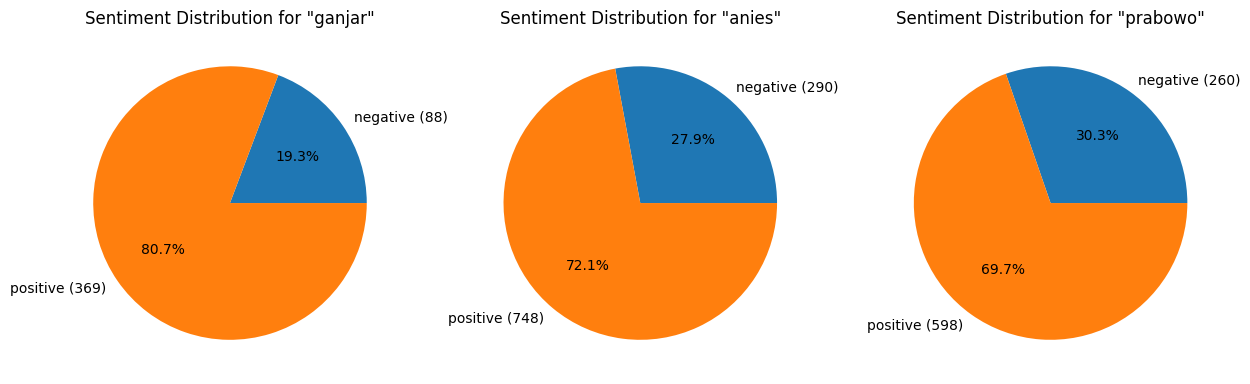

In [ ]:
# Memvisualisasikan distribusi sentimen untuk setiap kata kunci menggunakan pie chart
fig, axs = plt.subplots(1, len(sentiment_counts), figsize=(15,6))

for ax, (word, sentiment_count) in zip(axs, sentiment_counts.items()):
    # Hanya ambil sentimen 'positive' dan 'negative'
    sentiment_count = sentiment_count[sentiment_count.index.isin(['positive', 'negative'])]

    ax.pie(sentiment_count, labels=[f'{label} ({count})' for label, count in zip(sentiment_count.index, sentiment_count)], autopct='%1.1f%%')
    ax.set_title(f'Sentiment Distribution for "{word}"')

plt.show()


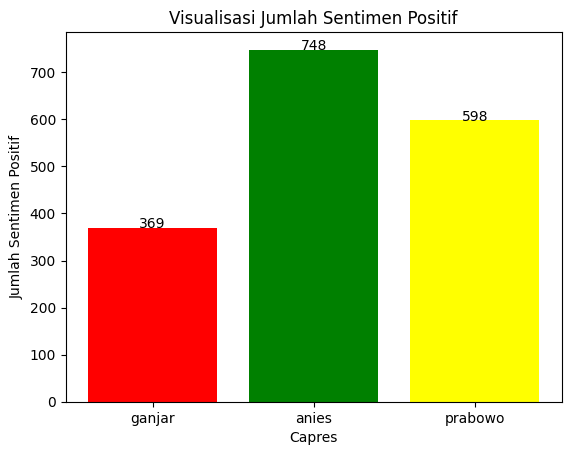

In [ ]:
# Membuat list dari kata kunci dan jumlah sentimen positif
words = [word for word in sentiment_counts.keys()]
positive_counts = [sentiment_counts[word]['positive'] for word in words]

# Membuat array dari jumlah sentimen positif
counts = np.array(positive_counts)

# Membuat bar plot dengan warna yang berbeda untuk setiap bar
colors = ['red', 'green', 'yellow']
plt.bar(words, counts, color=colors)

# Menambahkan angka di atas setiap bar
for i in range(len(words)):
    plt.text(i, counts[i], str(counts[i]), ha='center')

plt.xlabel('Capres')
plt.ylabel('Jumlah Sentimen Positif')
plt.title('Visualisasi Jumlah Sentimen Positif')
plt.show()

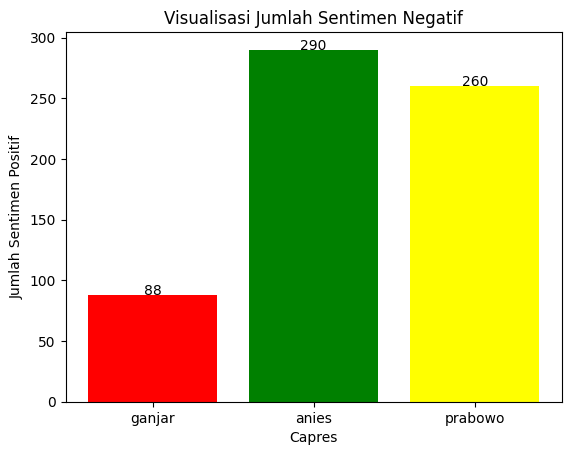

In [ ]:

# Membuat list dari kata kunci dan jumlah sentimen Negatif
words = [word for word in sentiment_counts.keys()]
positive_counts = [sentiment_counts[word]['negative'] for word in words]

# Membuat array dari jumlah sentimen positif
counts = np.array(positive_counts)

# Membuat bar plot dengan warna yang berbeda untuk setiap bar
colors = ['red', 'green', 'yellow']
plt.bar(words, counts, color=colors)

# Menambahkan angka di atas setiap bar
for i in range(len(words)):
    plt.text(i, counts[i], str(counts[i]), ha='center')

plt.xlabel('Capres')
plt.ylabel('Jumlah Sentimen Positif')
plt.title('Visualisasi Jumlah Sentimen Negatif')
plt.show()


### Random Forest

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Ubah set stopwords menjadi list
stopwords_list = list(stopwords)

clf = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords_list)),
                ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

# Melatih model
clf.fit(X_train, y_train)

# Membuat prediksi
predictions = clf.predict(X_test)

# Mencetak skor akurasi
print("Accuracy:", accuracy_score(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


Accuracy: 0.6663101604278074


In [ ]:
# Mencetak laporan klasifikasi
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.74      0.14      0.23       208
     neutral       0.65      0.67      0.66       241
    positive       0.67      0.89      0.76       486

    accuracy                           0.67       935
   macro avg       0.69      0.57      0.55       935
weighted avg       0.68      0.67      0.62       935



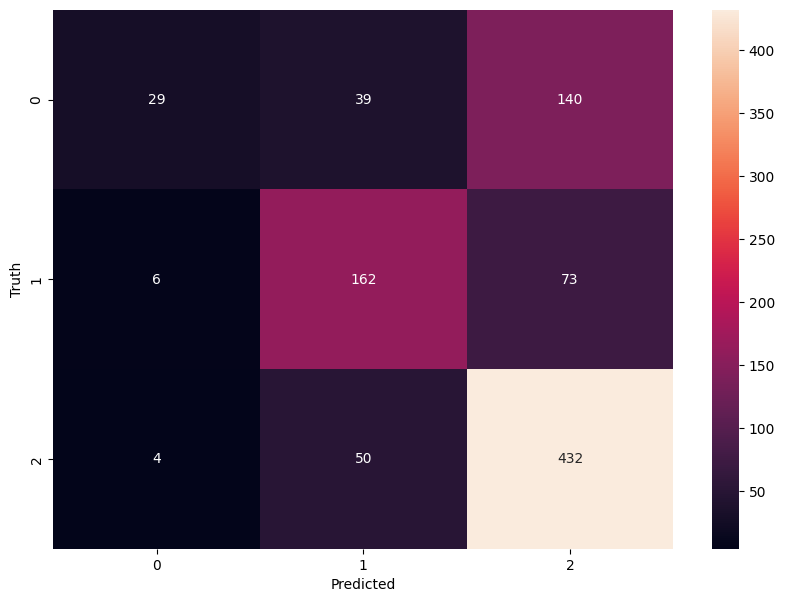

In [ ]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, predictions)

# Membuat plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
# Confusion matrix pada data uji
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, predictions))

# Confusion matrix pada data latih
print("Confusion Matrix (Training Set):")
train_predictions = clf.predict(X_train)
print(confusion_matrix(y_train, train_predictions))

Confusion Matrix (Test Set):
[[ 29  39 140]
 [  6 162  73]
 [  4  50 432]]
Confusion Matrix (Training Set):
[[ 837    3    0]
 [   0  945    1]
 [   0    2 1948]]


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'cou

Cross-Validation Scores: [0.64705882 0.66532798 0.64658635 0.64792503 0.64524766]
Mean Cross-Validation Score: 0.6504291676509961
Train Accuracy: 0.9983940042826552
Test Accuracy: 0.6663101604278074


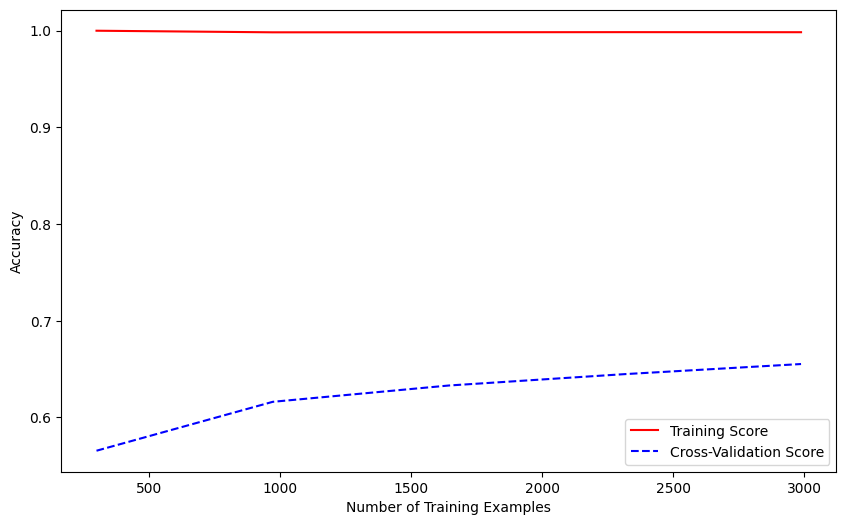

In [ ]:
from sklearn.model_selection import cross_val_score, learning_curve
import matplotlib.pyplot as plt

# Cross-Validation Score
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

# Akurasi pada Data Latih dan Data Uji
train_accuracy = clf.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, predictions)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'r-', label='Training Score')
plt.plot(train_sizes, test_mean, 'b--', label='Cross-Validation Score')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

#### Visualisasi

positive    2436
neutral     1187
negative    1048
Name: sentiment, dtype: int64


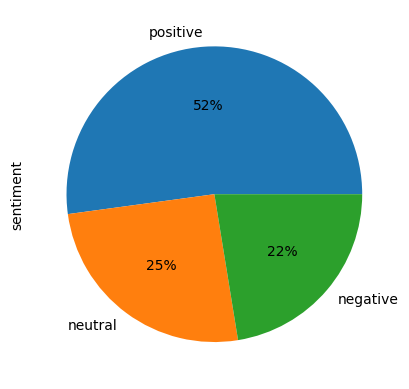

In [ ]:
# Memvisualisasikan distribusi sentimen menggunakan pie chart
data['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# Membuat wordcloud untuk setiap sentimen
stopwords = set(STOPWORDS)


sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)

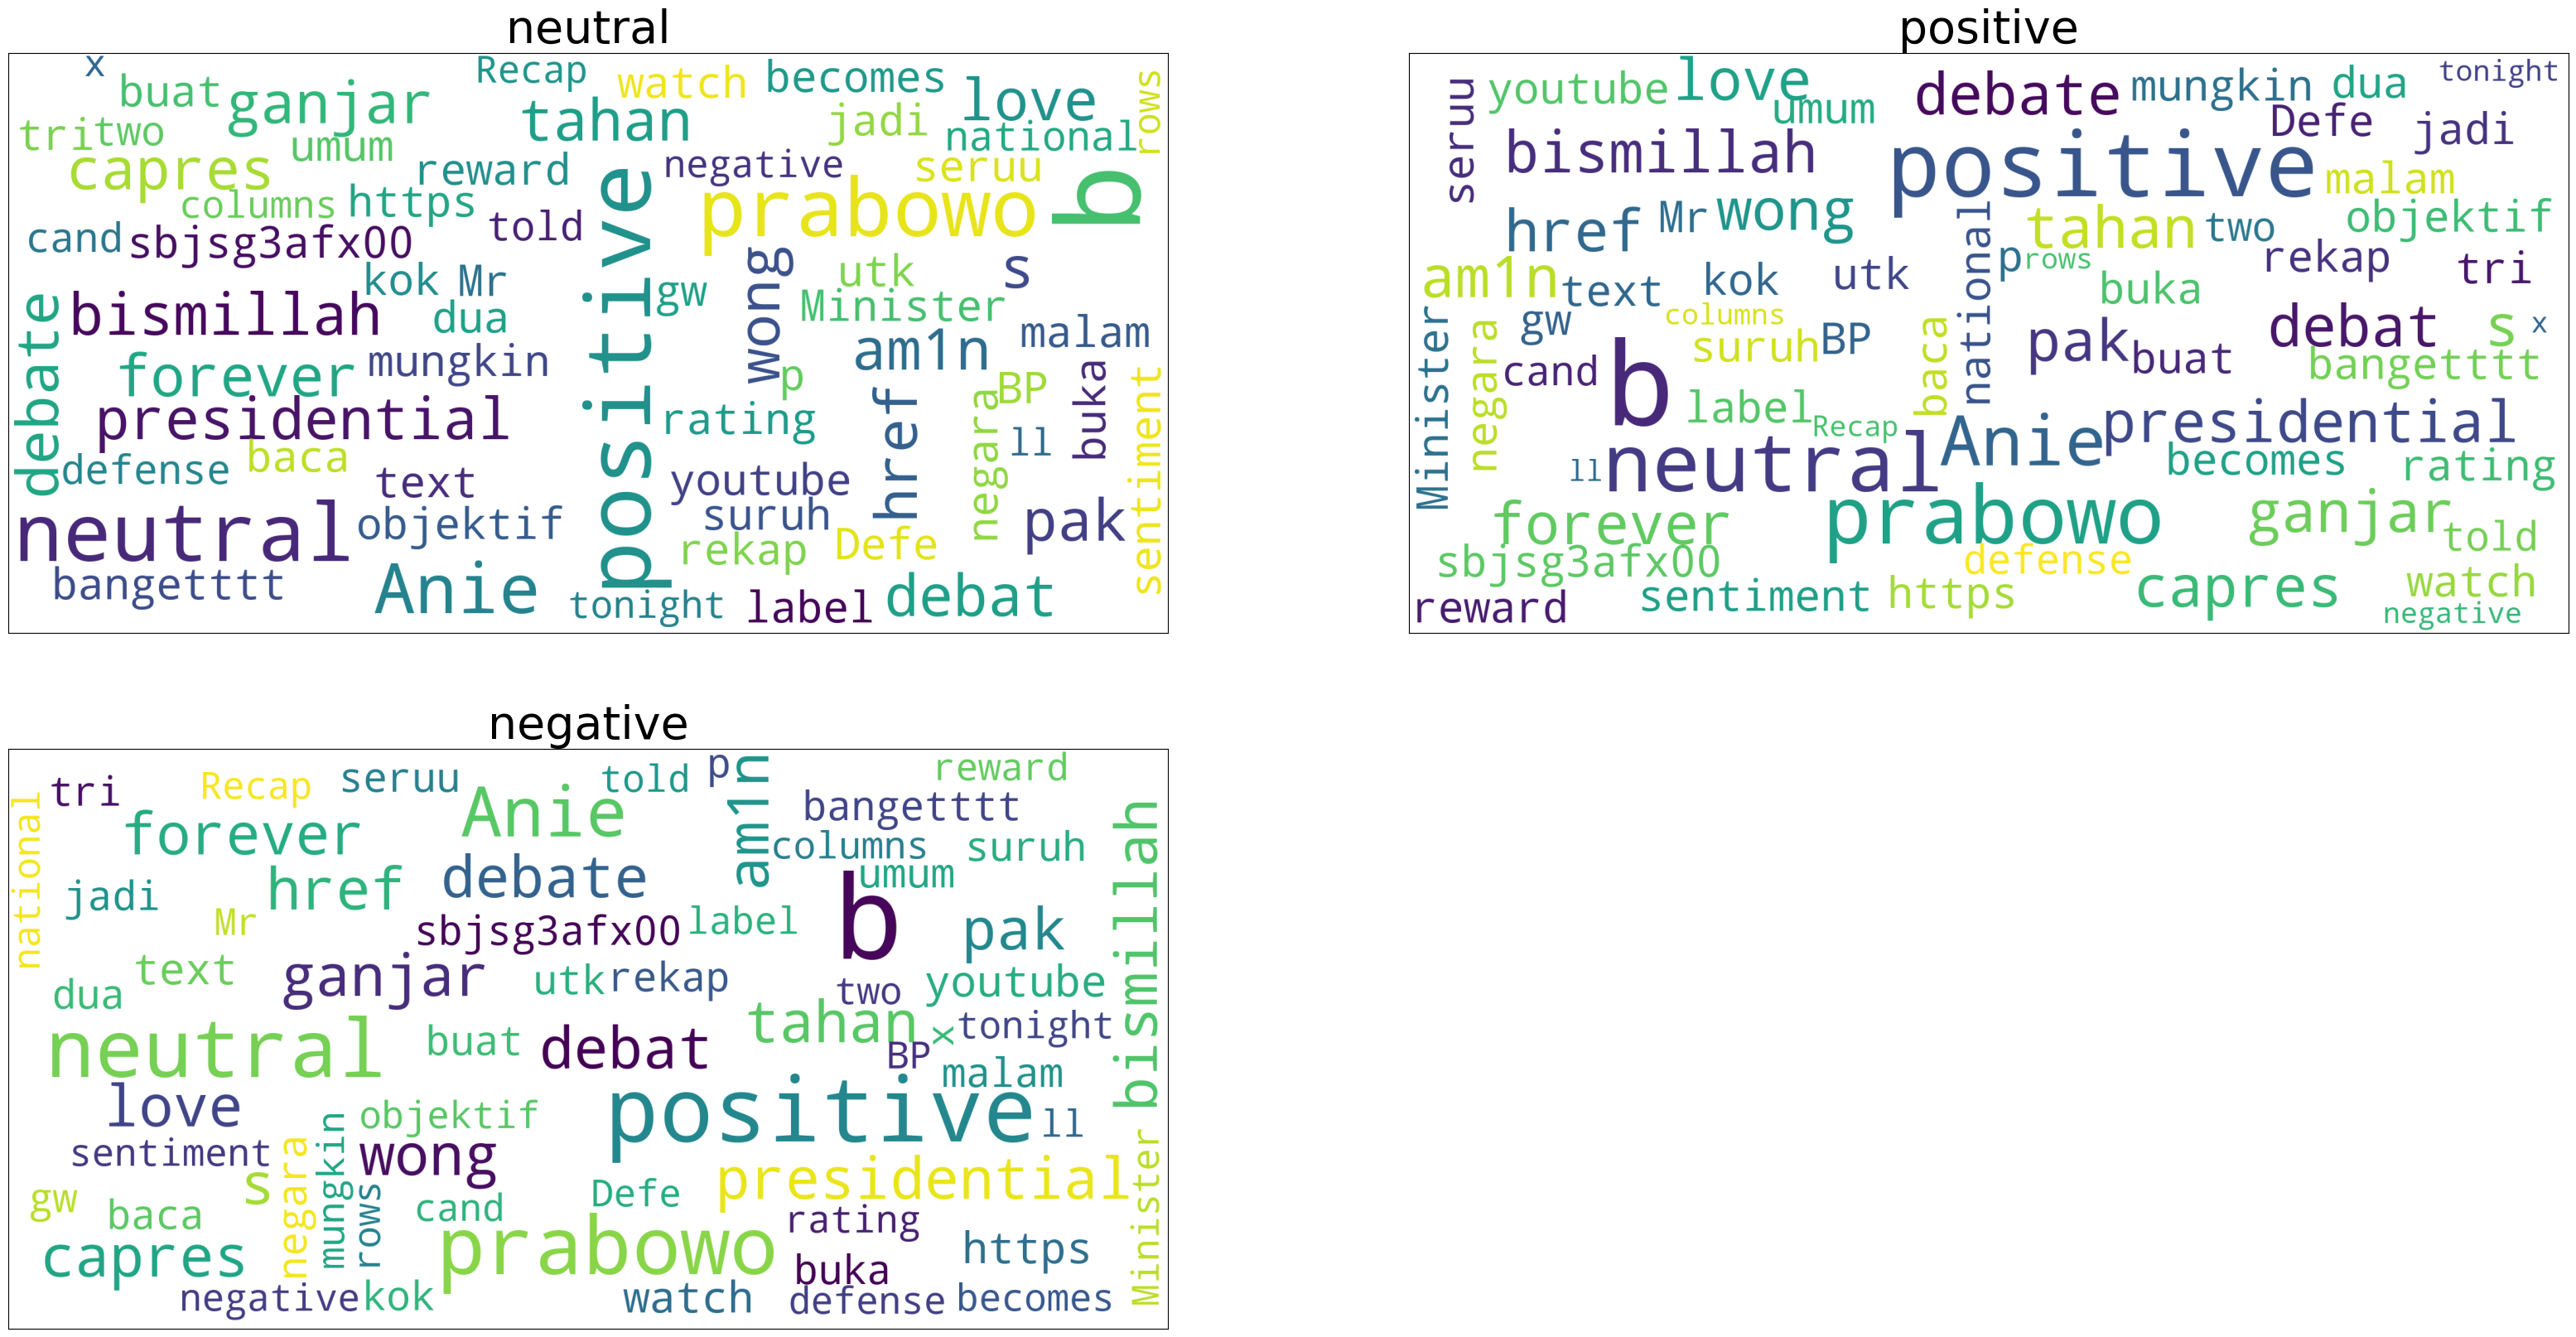

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot 2x2 grid word cloud for each sentiment
plt.figure(figsize=(40,20))

for index, col in enumerate(data['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = data[data['sentiment']==col]
    data1 = df1['label']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)

plt.show()
plt.tight_layout()


In [ ]:

# # Mencari kata-kata yang menyerupai kata kunci
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Kata-kata yang ingin dicari
words_to_match = ["ganjar", "anies", "prabowo"]

# Fungsi untuk mencari typo
def find_typo(data, column, words_to_match, threshold=80):
    typo_list = []
    for word_to_match in words_to_match:
        for index, row in data.iterrows():
            # Memastikan bahwa data adalah string
            if isinstance(row[column], str):
                ratio = fuzz.ratio(row[column].lower(), word_to_match)
                if ratio >= threshold:
                    typo_list.append((word_to_match, row[column]))
    return typo_list

# Mencari typo dalam kolom 'text'
typo_list = find_typo(data, 'text', words_to_match)

print(typo_list)
count = len(typo_list)
print(count)


[('ganjar', 'ganjar'), ('ganjar', 'ganjar r1'), ('anies', 'anies'), ('anies', 'anies'), ('anies', 'anies'), ('anies', 'anis'), ('anies', 'anies'), ('anies', 'anis'), ('anies', 'anies'), ('anies', 'anis'), ('prabowo', 'prbowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowoo'), ('prabowo', 'prabowo'), ('prabowo', 'prabawo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'ko prabowo'), ('prabowo', 'praboow'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo')]
29


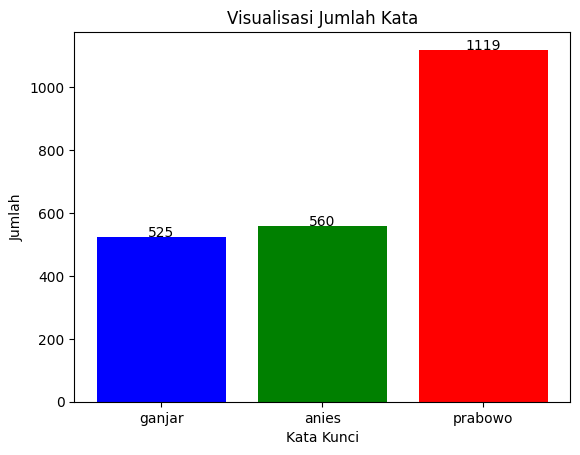

In [ ]:
# Kata-kata yang ingin dicari

# Menghitung jumlah kemunculan kata kunci
word_counts = {}

for word in words_to_match:
    # Menghitung berapa kali kata muncul dalam kolom 'text'
    word_counts[word] = data['text'].str.contains(word, case=False, na=False).sum()

words = [word for word in word_counts.keys()]
counts = [word_counts[word] for word in words]

counts_array = np.array(counts)

# Memvisualisasikan jumlah kemunculan kata kunci menggunakan bar chart
plt.bar(words, counts_array, color=['blue', 'green', 'red'])

for i in range(len(words)):
    plt.text(i, counts_array[i], str(counts_array[i]), ha='center')

plt.xlabel('Kata Kunci')
plt.ylabel('Jumlah')
plt.title('Visualisasi Jumlah Kata')
plt.show()


In [ ]:
# Fungsi untuk mencari typo
def find_typo(data, column, words_to_match, threshold=80):
    typo_dict = {word: [] for word in words_to_match}
    for word_to_match in words_to_match:
        for index, row in data.iterrows():
            ratio = fuzz.ratio(row[column].lower(), word_to_match)
            if ratio >= threshold:
                typo_dict[word_to_match].append(row[column])
    return typo_dict

# Mencari typo dalam kolom 'text'
typo_dict = find_typo(data, 'text', words_to_match)

# Menghitung distribusi sentimen untuk kata kunci dan kata-kata yang mirip
sentiment_counts = {}

for word, similar_words in typo_dict.items():
    # Menggabungkan kata asli dan kata-kata yang mirip
    all_words = [word] + similar_words
    # Mencari frekuensi sentimen dari kata-kata asli dan kata-kata yang mirip
    sentiment_counts[word] = data[data['text'].str.contains('|'.join(all_words), case=False)].groupby('sentiment').size()

print(sentiment_counts)


{'ganjar': sentiment
negative     88
neutral      68
positive    369
dtype: int64, 'anies': sentiment
negative    290
neutral     246
positive    748
dtype: int64, 'prabowo': sentiment
negative    260
neutral     265
positive    598
dtype: int64}


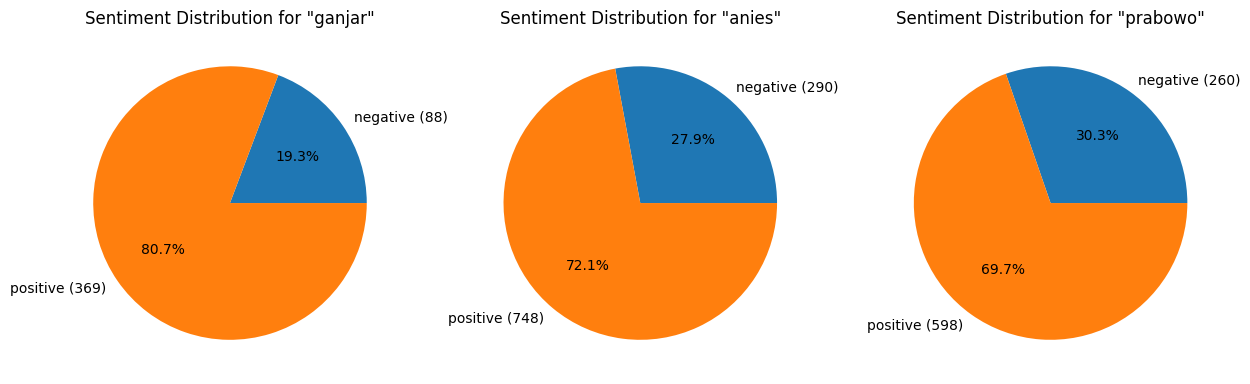

In [ ]:
# Memvisualisasikan distribusi sentimen untuk setiap kata kunci menggunakan pie chart
fig, axs = plt.subplots(1, len(sentiment_counts), figsize=(15,6))

for ax, (word, sentiment_count) in zip(axs, sentiment_counts.items()):
    # Hanya ambil sentimen 'positive' dan 'negative'
    sentiment_count = sentiment_count[sentiment_count.index.isin(['positive', 'negative'])]

    ax.pie(sentiment_count, labels=[f'{label} ({count})' for label, count in zip(sentiment_count.index, sentiment_count)], autopct='%1.1f%%')
    ax.set_title(f'Sentiment Distribution for "{word}"')

plt.show()


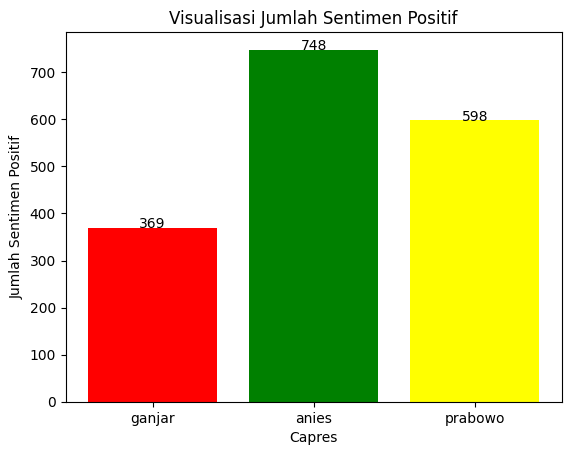

In [ ]:
# Membuat list dari kata kunci dan jumlah sentimen positif
words = [word for word in sentiment_counts.keys()]
positive_counts = [sentiment_counts[word]['positive'] for word in words]

# Membuat array dari jumlah sentimen positif
counts = np.array(positive_counts)

# Membuat bar plot dengan warna yang berbeda untuk setiap bar
colors = ['red', 'green', 'yellow']
plt.bar(words, counts, color=colors)

# Menambahkan angka di atas setiap bar
for i in range(len(words)):
    plt.text(i, counts[i], str(counts[i]), ha='center')

plt.xlabel('Capres')
plt.ylabel('Jumlah Sentimen Positif')
plt.title('Visualisasi Jumlah Sentimen Positif')
plt.show()

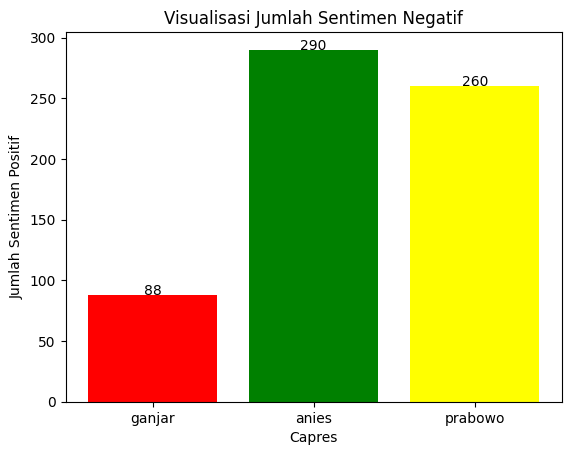

In [ ]:

# Membuat list dari kata kunci dan jumlah sentimen Negatif
words = [word for word in sentiment_counts.keys()]
positive_counts = [sentiment_counts[word]['negative'] for word in words]

# Membuat array dari jumlah sentimen positif
counts = np.array(positive_counts)

# Membuat bar plot dengan warna yang berbeda untuk setiap bar
colors = ['red', 'green', 'yellow']
plt.bar(words, counts, color=colors)

# Menambahkan angka di atas setiap bar
for i in range(len(words)):
    plt.text(i, counts[i], str(counts[i]), ha='center')

plt.xlabel('Capres')
plt.ylabel('Jumlah Sentimen Positif')
plt.title('Visualisasi Jumlah Sentimen Negatif')
plt.show()


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Ubah set stopwords menjadi list
stopwords_list = list(stopwords)

clf = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords_list)),
                ('clf', DecisionTreeClassifier())])
# Melatih model
clf.fit(X_train, y_train)

# Membuat prediksi
predictions = clf.predict(X_test)

# Mencetak skor akurasi
print("Accuracy:", accuracy_score(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


Accuracy: 0.6160427807486631


In [ ]:
# Mencetak laporan klasifikasi
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.46      0.36      0.40       208
     neutral       0.58      0.70      0.64       241
    positive       0.69      0.69      0.69       486

    accuracy                           0.62       935
   macro avg       0.58      0.58      0.57       935
weighted avg       0.61      0.62      0.61       935



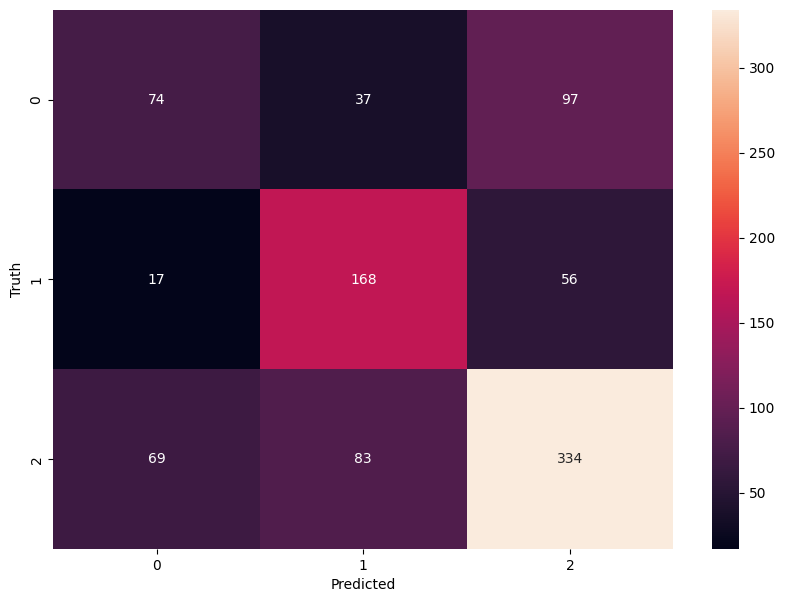

In [ ]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, predictions)

# Membuat plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
# Confusion matrix pada data uji
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, predictions))

# Confusion matrix pada data latih
print("Confusion Matrix (Training Set):")
train_predictions = clf.predict(X_train)
print(confusion_matrix(y_train, train_predictions))

Confusion Matrix (Test Set):
[[ 74  37  97]
 [ 17 168  56]
 [ 69  83 334]]
Confusion Matrix (Training Set):
[[ 837    3    0]
 [   0  946    0]
 [   0    3 1947]]


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'cou

Cross-Validation Scores: [0.56550802 0.57697456 0.56492637 0.53681392 0.56894244]
Mean Cross-Validation Score: 0.5626330634480883
Train Accuracy: 0.9983940042826552
Test Accuracy: 0.6160427807486631


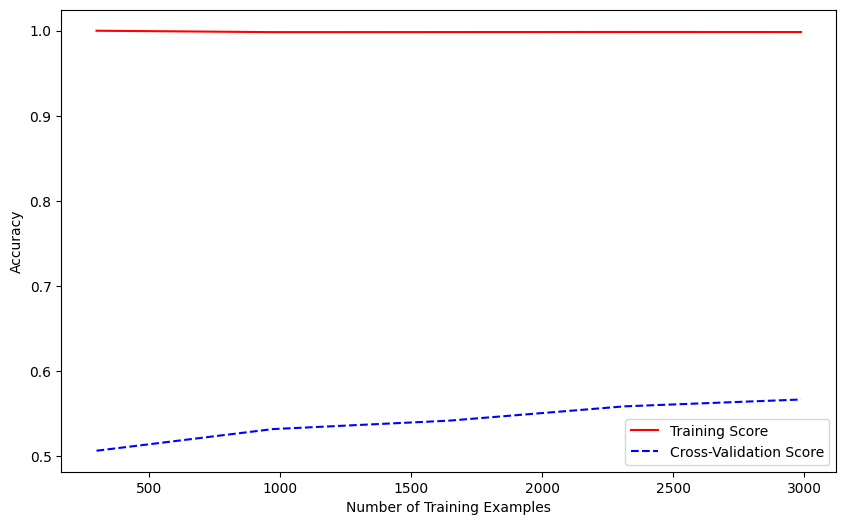

In [ ]:
from sklearn.model_selection import cross_val_score, learning_curve
import matplotlib.pyplot as plt

# Cross-Validation Score
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

# Akurasi pada Data Latih dan Data Uji
train_accuracy = clf.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, predictions)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'r-', label='Training Score')
plt.plot(train_sizes, test_mean, 'b--', label='Cross-Validation Score')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

#### Visualisasi

positive    2436
neutral     1187
negative    1048
Name: sentiment, dtype: int64


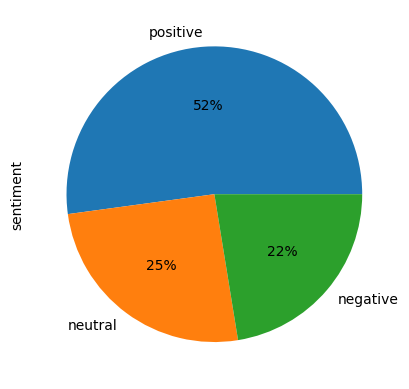

In [ ]:
# Memvisualisasikan distribusi sentimen menggunakan pie chart
data['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# Membuat wordcloud untuk setiap sentimen
stopwords = set(STOPWORDS)


sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)

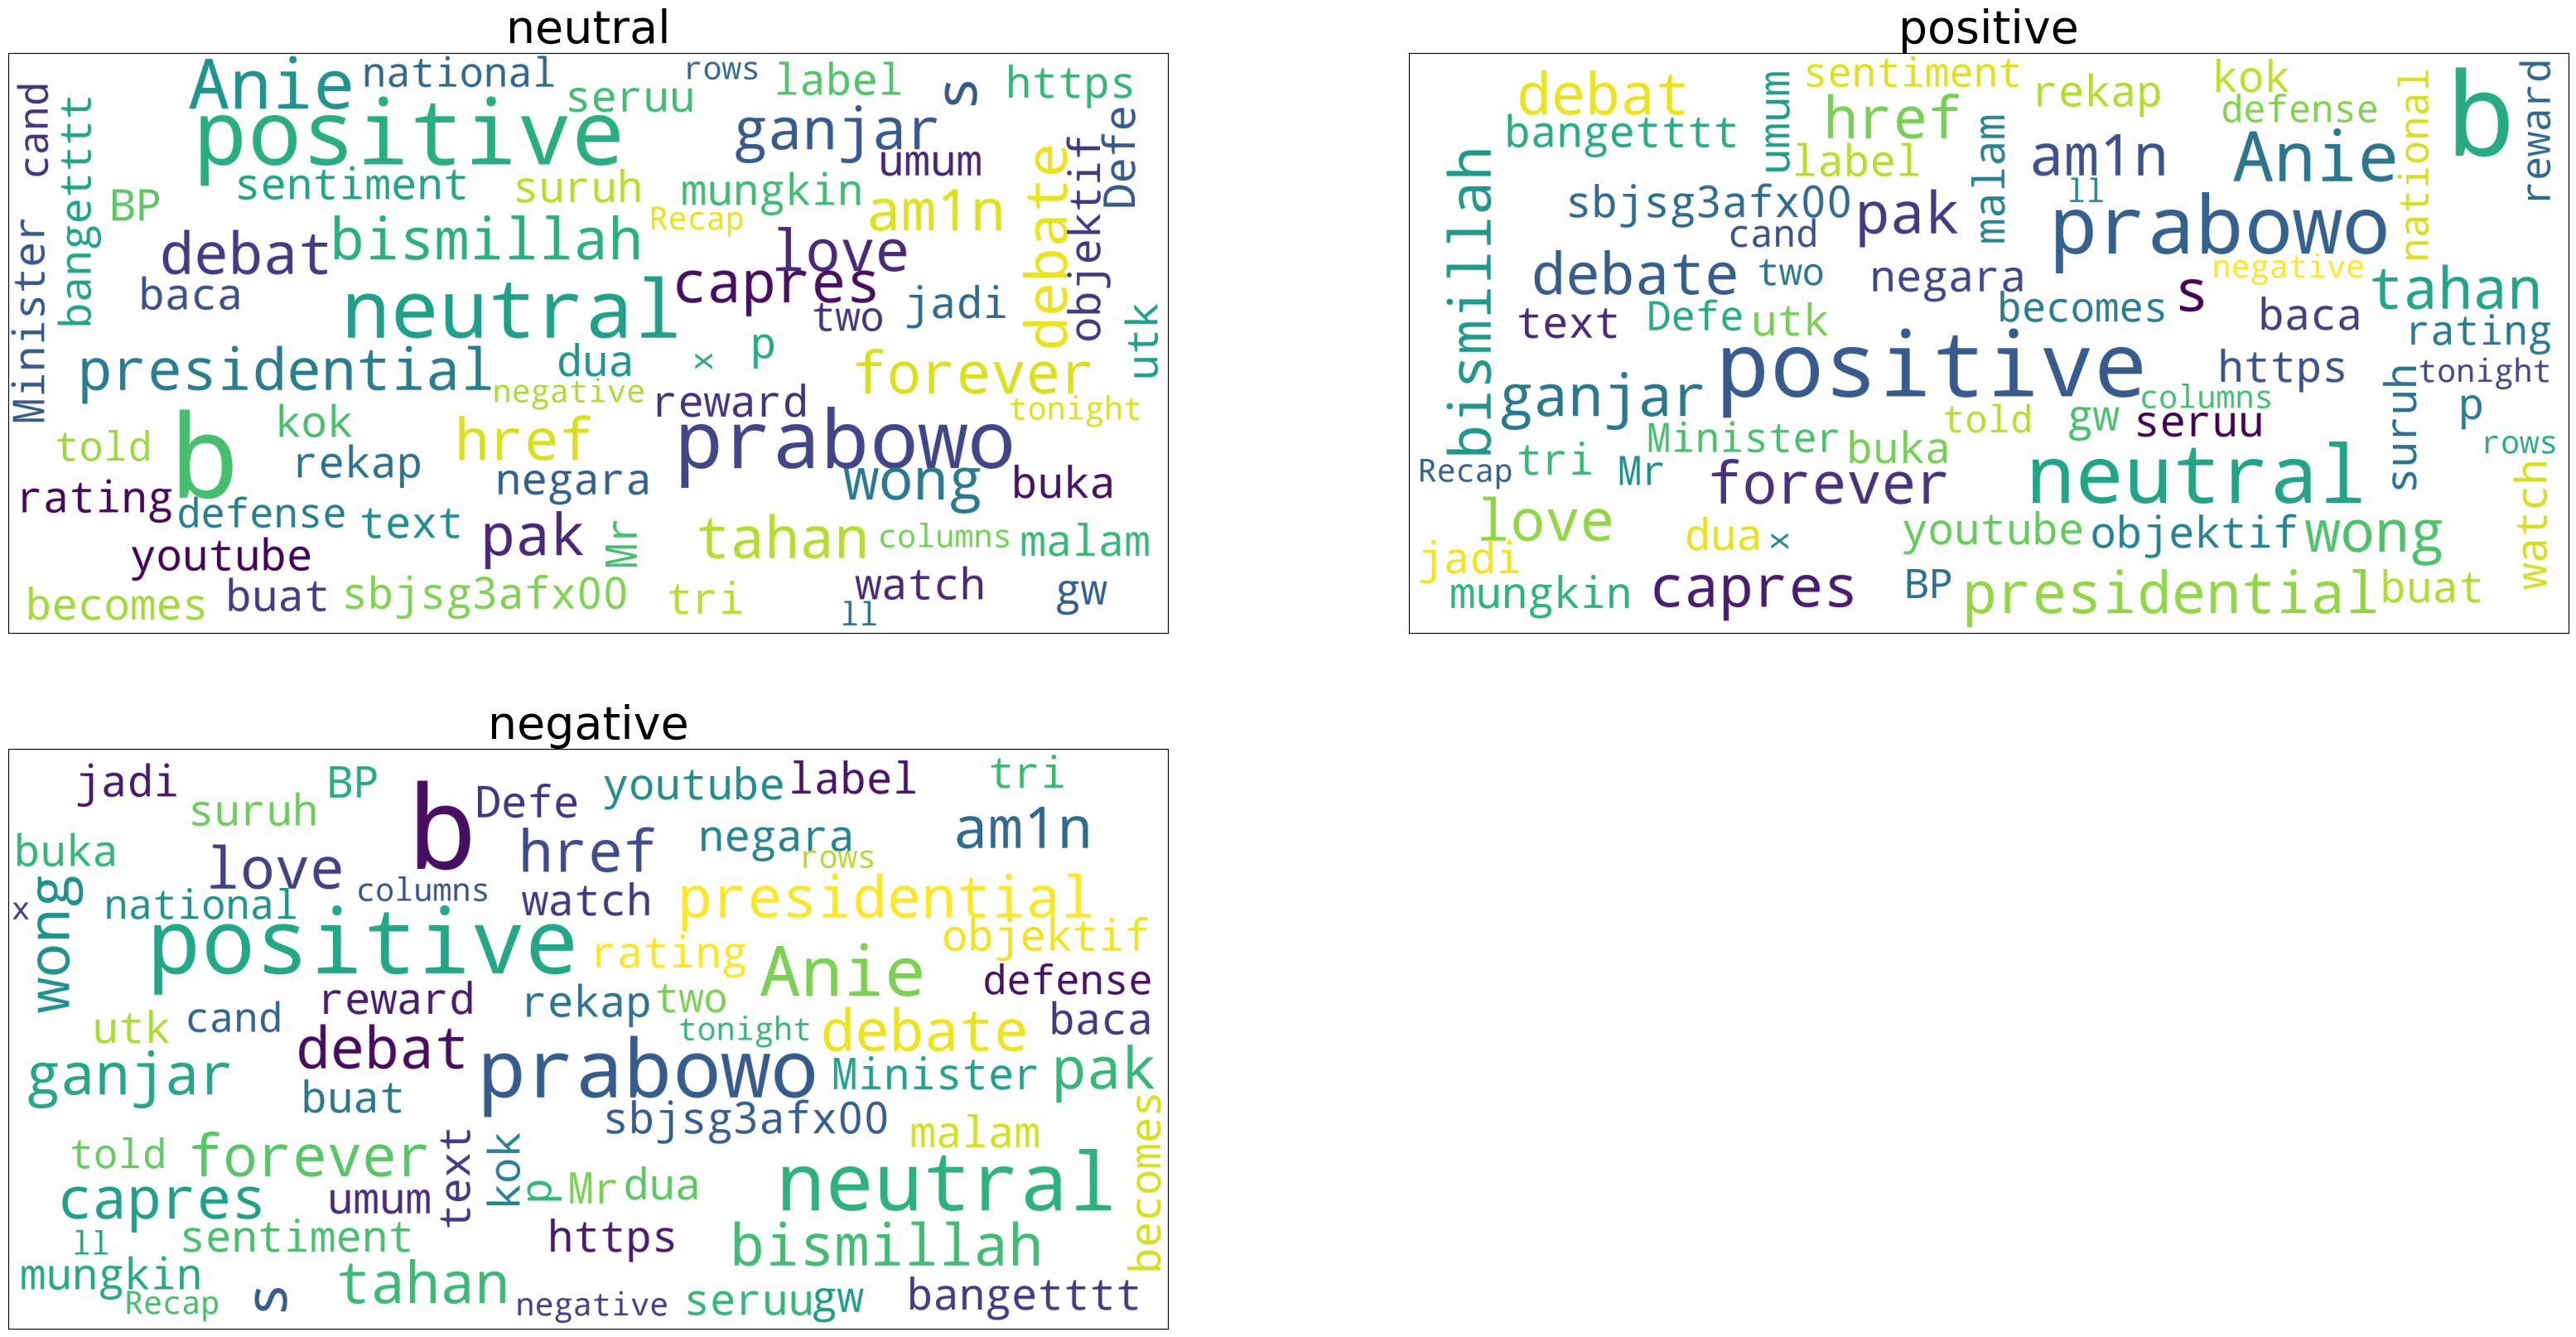

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot 2x2 grid word cloud for each sentiment
plt.figure(figsize=(40,20))

for index, col in enumerate(data['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = data[data['sentiment']==col]
    data1 = df1['label']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)

plt.show()
plt.tight_layout()


In [ ]:

# # Mencari kata-kata yang menyerupai kata kunci
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Kata-kata yang ingin dicari
words_to_match = ["ganjar", "anies", "prabowo"]

# Fungsi untuk mencari typo
def find_typo(data, column, words_to_match, threshold=80):
    typo_list = []
    for word_to_match in words_to_match:
        for index, row in data.iterrows():
            # Memastikan bahwa data adalah string
            if isinstance(row[column], str):
                ratio = fuzz.ratio(row[column].lower(), word_to_match)
                if ratio >= threshold:
                    typo_list.append((word_to_match, row[column]))
    return typo_list

# Mencari typo dalam kolom 'text'
typo_list = find_typo(data, 'text', words_to_match)

print(typo_list)
count = len(typo_list)
print(count)


[('ganjar', 'ganjar'), ('ganjar', 'ganjar r1'), ('anies', 'anies'), ('anies', 'anies'), ('anies', 'anies'), ('anies', 'anis'), ('anies', 'anies'), ('anies', 'anis'), ('anies', 'anies'), ('anies', 'anis'), ('prabowo', 'prbowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowoo'), ('prabowo', 'prabowo'), ('prabowo', 'prabawo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'ko prabowo'), ('prabowo', 'praboow'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo'), ('prabowo', 'prabowo')]
29


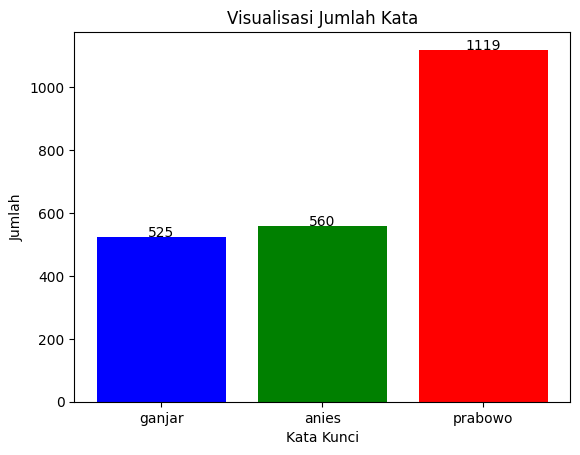

In [ ]:
# Kata-kata yang ingin dicari

# Menghitung jumlah kemunculan kata kunci
word_counts = {}

for word in words_to_match:
    # Menghitung berapa kali kata muncul dalam kolom 'text'
    word_counts[word] = data['text'].str.contains(word, case=False, na=False).sum()

words = [word for word in word_counts.keys()]
counts = [word_counts[word] for word in words]

counts_array = np.array(counts)

# Memvisualisasikan jumlah kemunculan kata kunci menggunakan bar chart
plt.bar(words, counts_array, color=['blue', 'green', 'red'])

for i in range(len(words)):
    plt.text(i, counts_array[i], str(counts_array[i]), ha='center')

plt.xlabel('Kata Kunci')
plt.ylabel('Jumlah')
plt.title('Visualisasi Jumlah Kata')
plt.show()


In [ ]:
# Fungsi untuk mencari typo
def find_typo(data, column, words_to_match, threshold=80):
    typo_dict = {word: [] for word in words_to_match}
    for word_to_match in words_to_match:
        for index, row in data.iterrows():
            ratio = fuzz.ratio(row[column].lower(), word_to_match)
            if ratio >= threshold:
                typo_dict[word_to_match].append(row[column])
    return typo_dict

# Mencari typo dalam kolom 'text'
typo_dict = find_typo(data, 'text', words_to_match)

# Menghitung distribusi sentimen untuk kata kunci dan kata-kata yang mirip
sentiment_counts = {}

for word, similar_words in typo_dict.items():
    # Menggabungkan kata asli dan kata-kata yang mirip
    all_words = [word] + similar_words
    # Mencari frekuensi sentimen dari kata-kata asli dan kata-kata yang mirip
    sentiment_counts[word] = data[data['text'].str.contains('|'.join(all_words), case=False)].groupby('sentiment').size()

print(sentiment_counts)


{'ganjar': sentiment
negative     88
neutral      68
positive    369
dtype: int64, 'anies': sentiment
negative    290
neutral     246
positive    748
dtype: int64, 'prabowo': sentiment
negative    260
neutral     265
positive    598
dtype: int64}


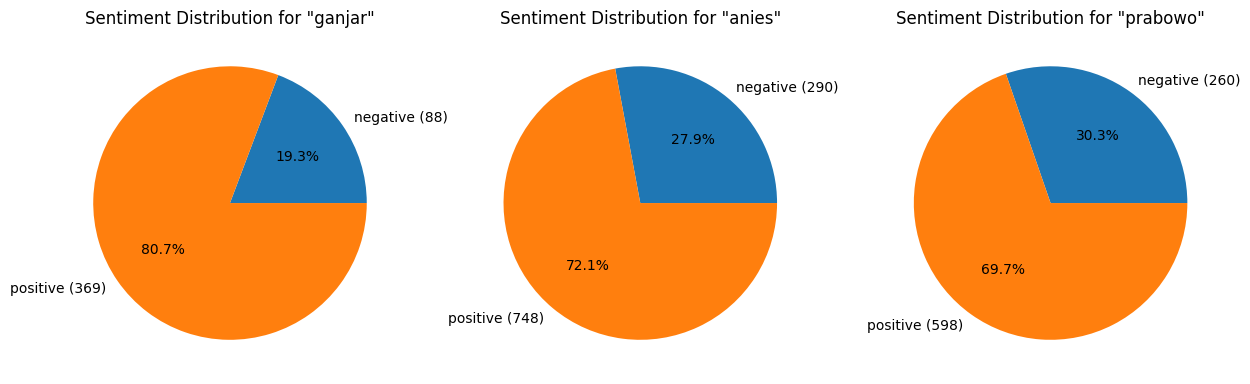

In [ ]:
# Memvisualisasikan distribusi sentimen untuk setiap kata kunci menggunakan pie chart
fig, axs = plt.subplots(1, len(sentiment_counts), figsize=(15,6))

for ax, (word, sentiment_count) in zip(axs, sentiment_counts.items()):
    # Hanya ambil sentimen 'positive' dan 'negative'
    sentiment_count = sentiment_count[sentiment_count.index.isin(['positive', 'negative'])]

    ax.pie(sentiment_count, labels=[f'{label} ({count})' for label, count in zip(sentiment_count.index, sentiment_count)], autopct='%1.1f%%')
    ax.set_title(f'Sentiment Distribution for "{word}"')

plt.show()


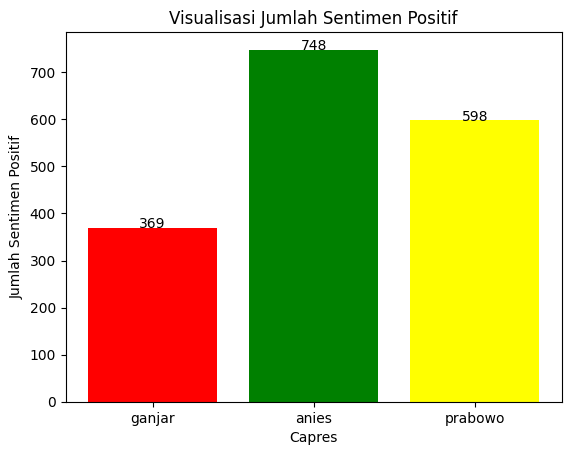

In [ ]:
# Membuat list dari kata kunci dan jumlah sentimen positif
words = [word for word in sentiment_counts.keys()]
positive_counts = [sentiment_counts[word]['positive'] for word in words]

# Membuat array dari jumlah sentimen positif
counts = np.array(positive_counts)

# Membuat bar plot dengan warna yang berbeda untuk setiap bar
colors = ['red', 'green', 'yellow']
plt.bar(words, counts, color=colors)

# Menambahkan angka di atas setiap bar
for i in range(len(words)):
    plt.text(i, counts[i], str(counts[i]), ha='center')

plt.xlabel('Capres')
plt.ylabel('Jumlah Sentimen Positif')
plt.title('Visualisasi Jumlah Sentimen Positif')
plt.show()

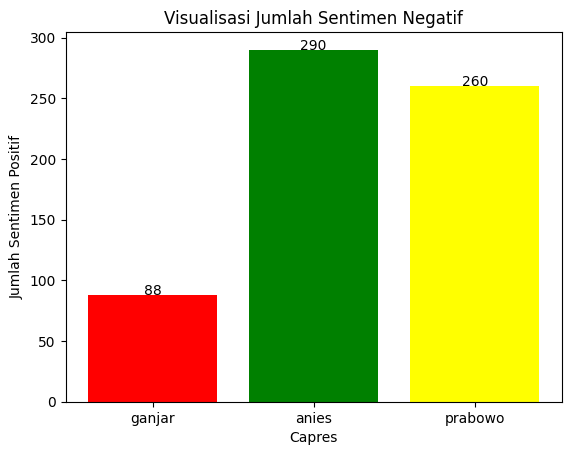

In [ ]:

# Membuat list dari kata kunci dan jumlah sentimen Negatif
words = [word for word in sentiment_counts.keys()]
positive_counts = [sentiment_counts[word]['negative'] for word in words]

# Membuat array dari jumlah sentimen positif
counts = np.array(positive_counts)

# Membuat bar plot dengan warna yang berbeda untuk setiap bar
colors = ['red', 'green', 'yellow']
plt.bar(words, counts, color=colors)

# Menambahkan angka di atas setiap bar
for i in range(len(words)):
    plt.text(i, counts[i], str(counts[i]), ha='center')

plt.xlabel('Capres')
plt.ylabel('Jumlah Sentimen Positif')
plt.title('Visualisasi Jumlah Sentimen Negatif')
plt.show()


## 11. Menyimpan Model

Kode ini menyimpan model yang telah dilatih ke dalam file debat_sentiment.pkl menggunakan library pickle.

In [ ]:
# save model
pickle.dump(clf, open('debat_sentiment.pkl', 'wb'))